In [1]:
import pandas as pd

projects_df = pd.read_csv("Проектные_данные_bnMAPpro.csv")
offers_df = pd.read_csv("offers_bnMAPpro.csv")

Проблемные даты: 0


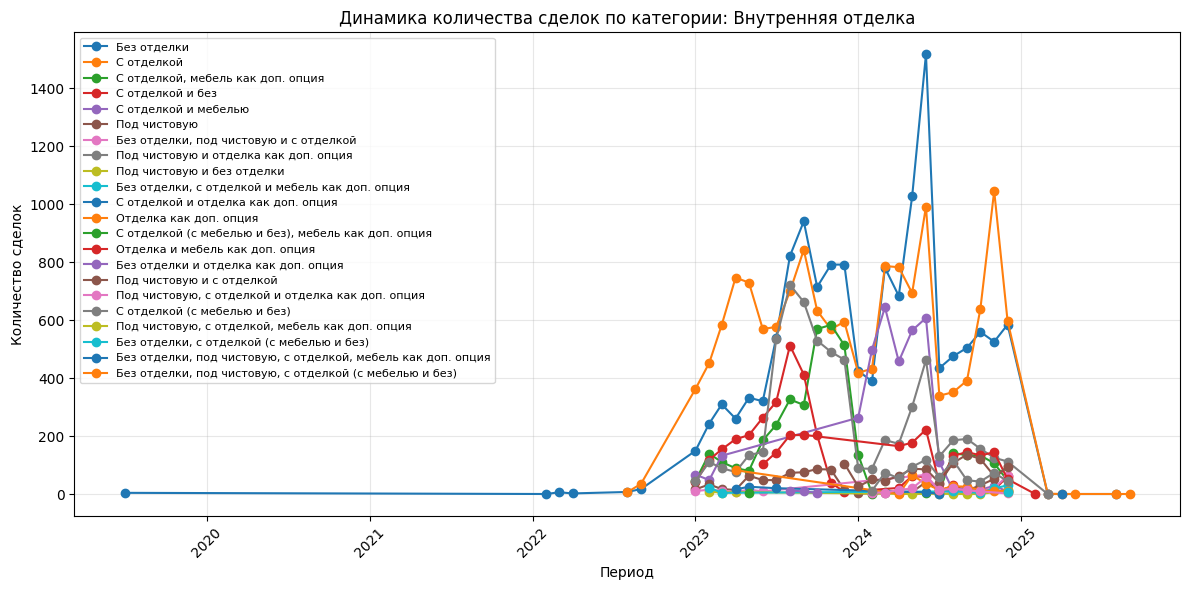

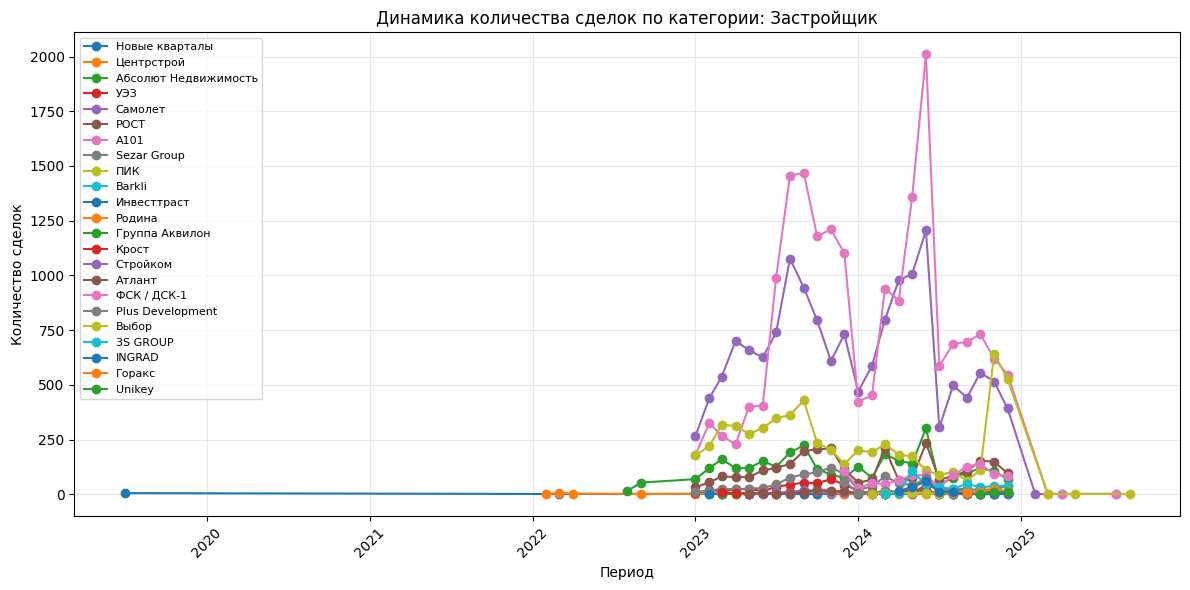

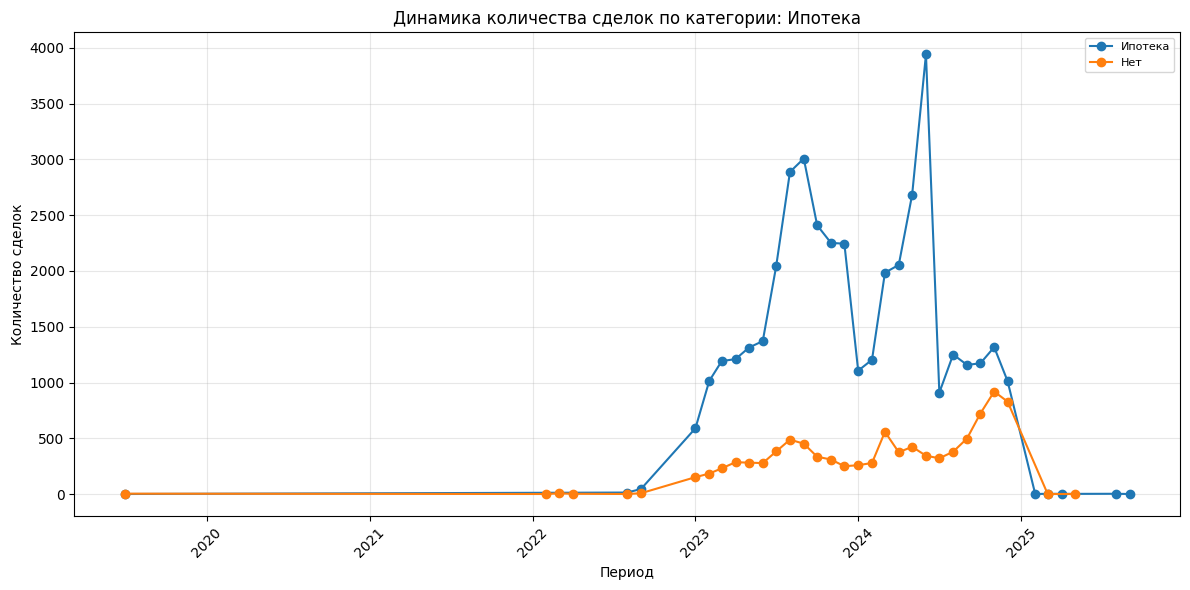

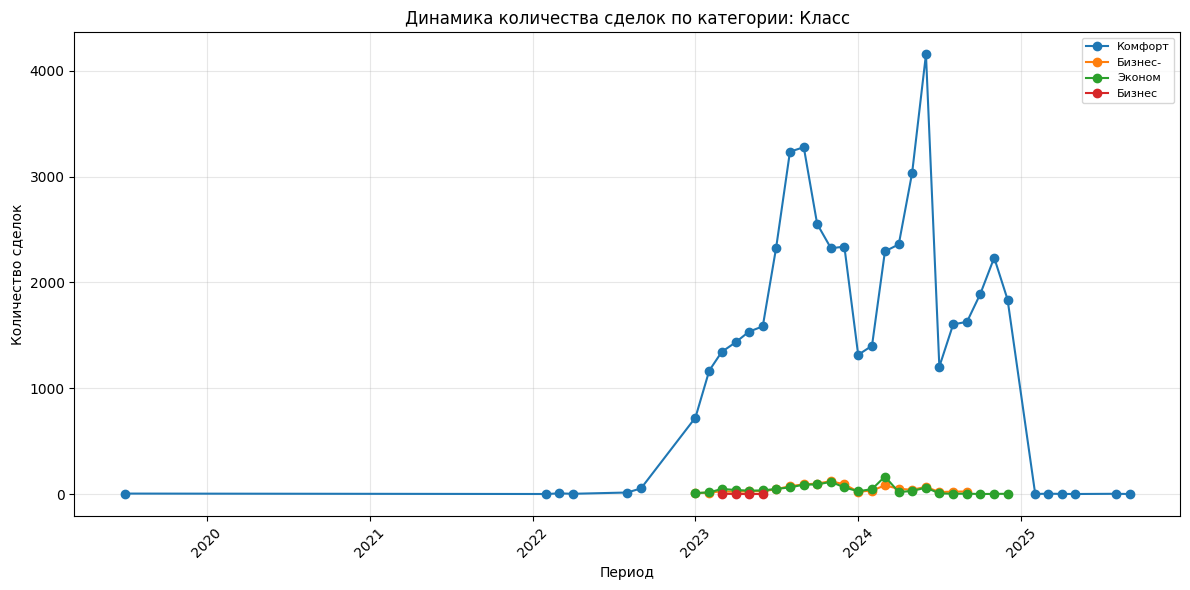

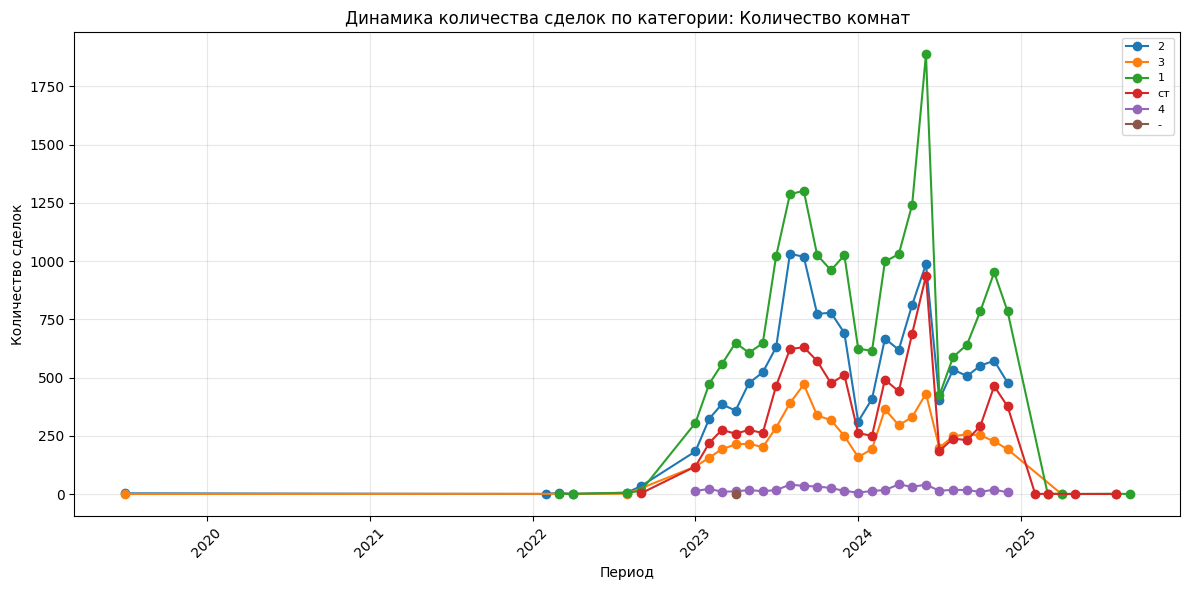

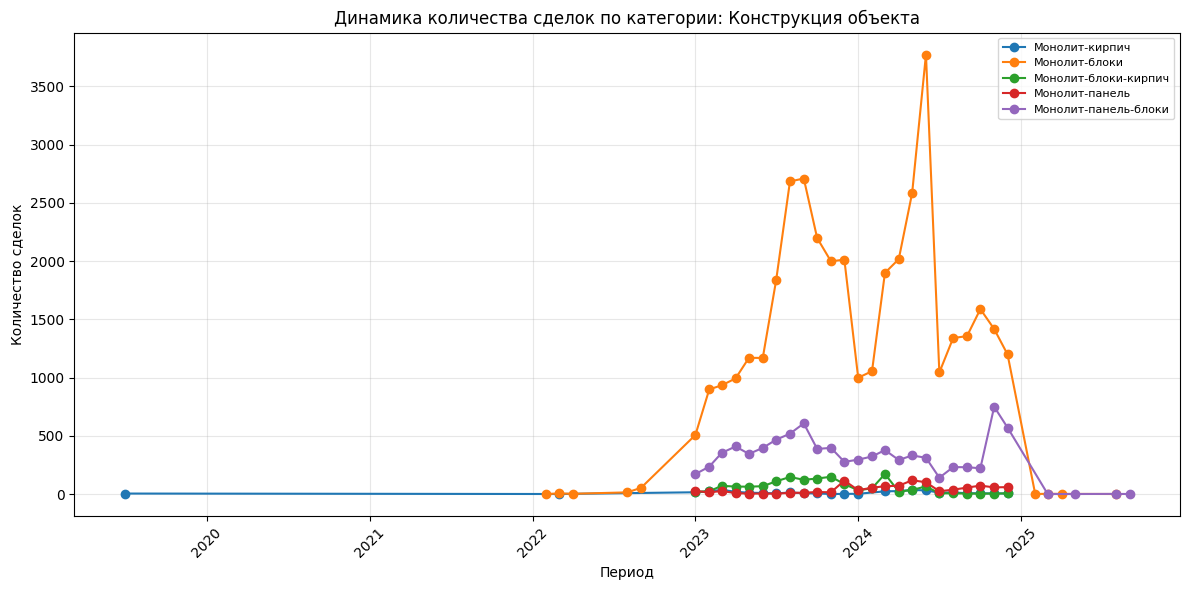

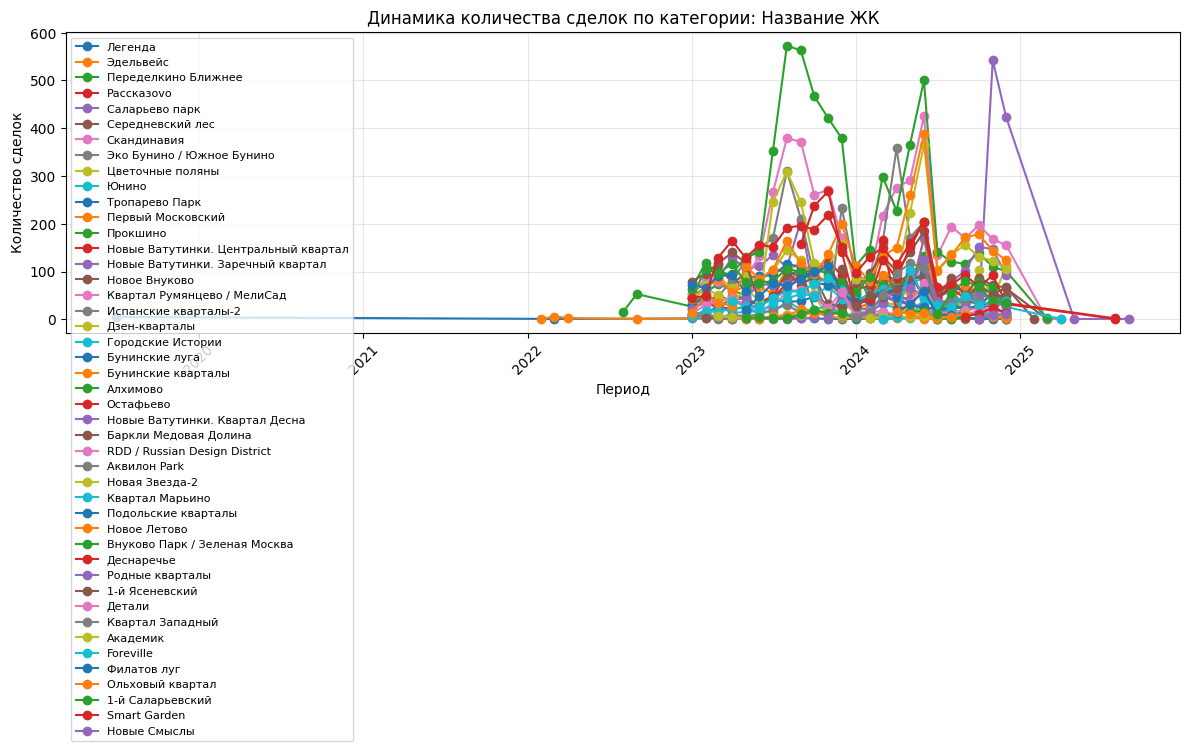

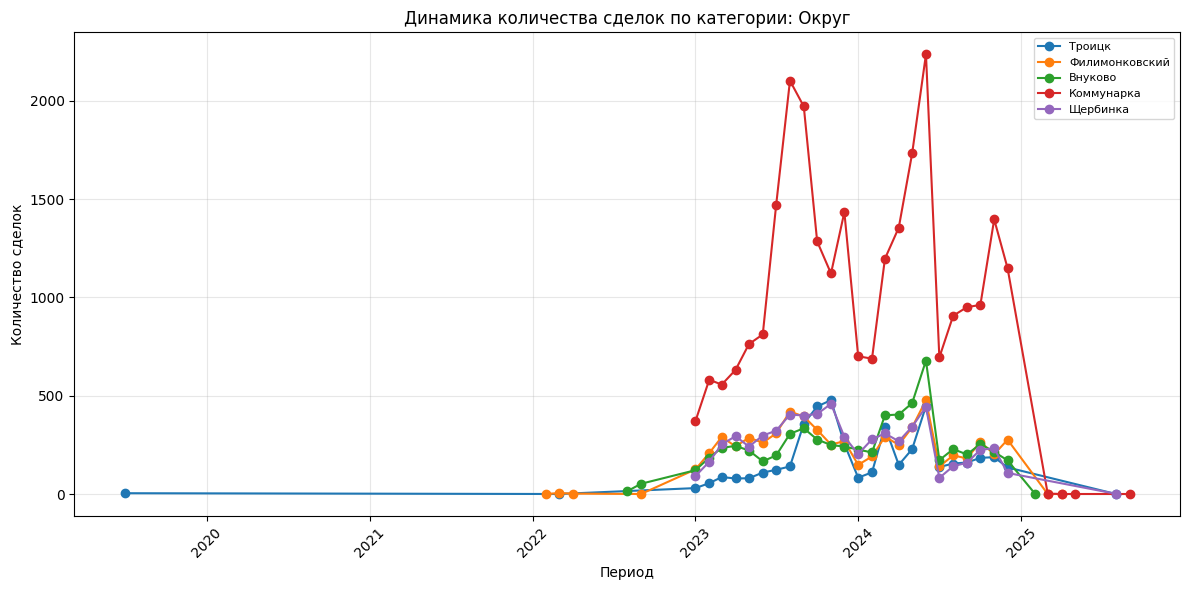

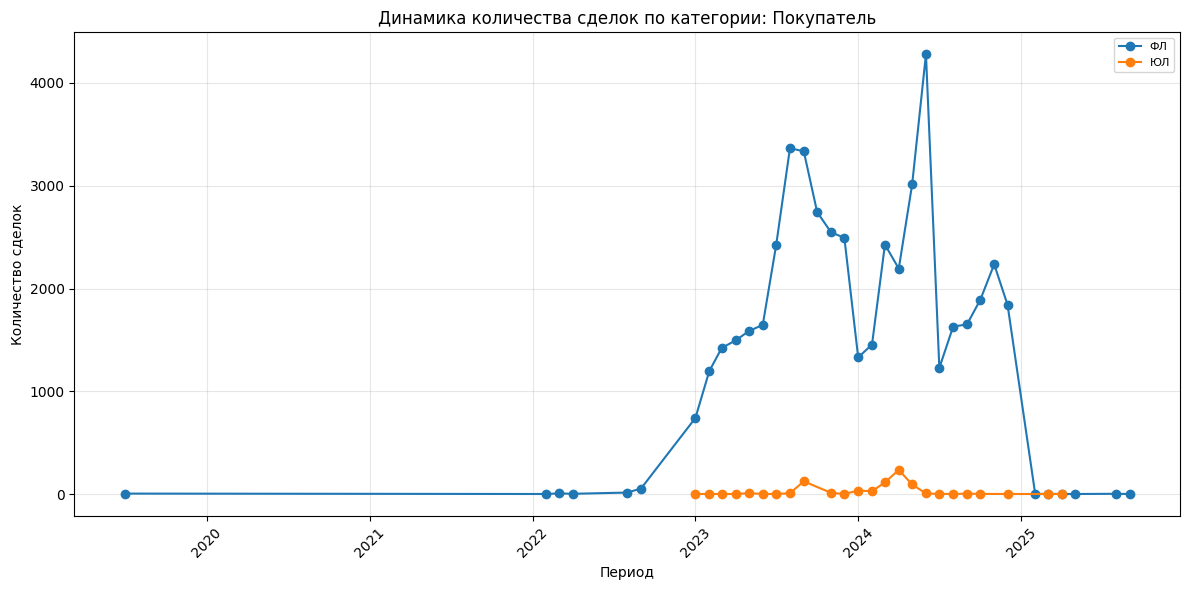

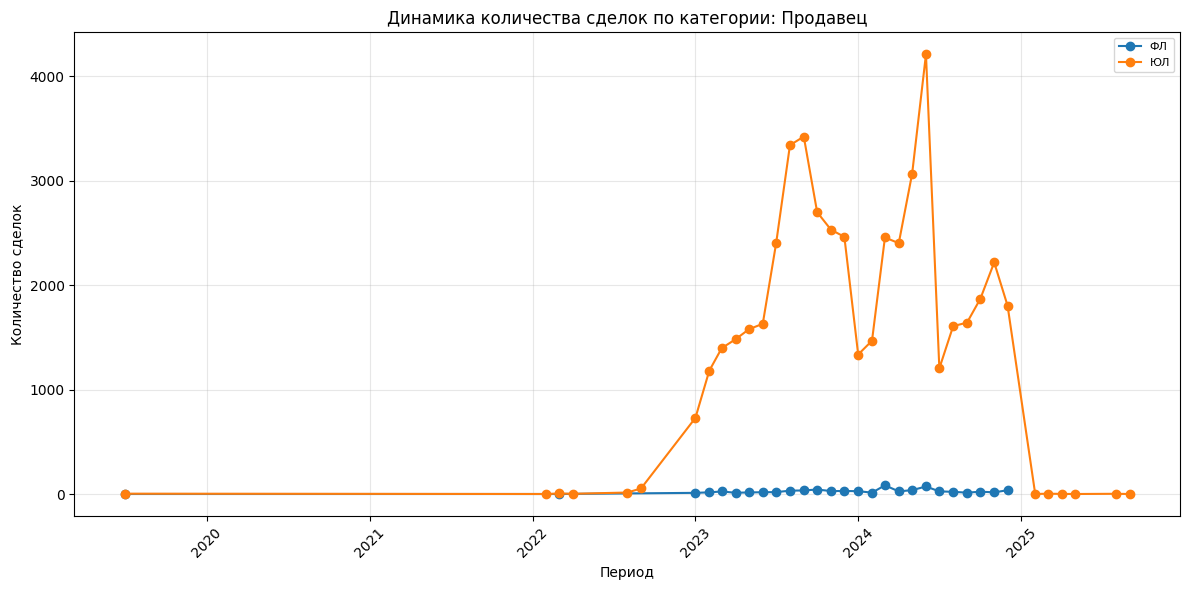

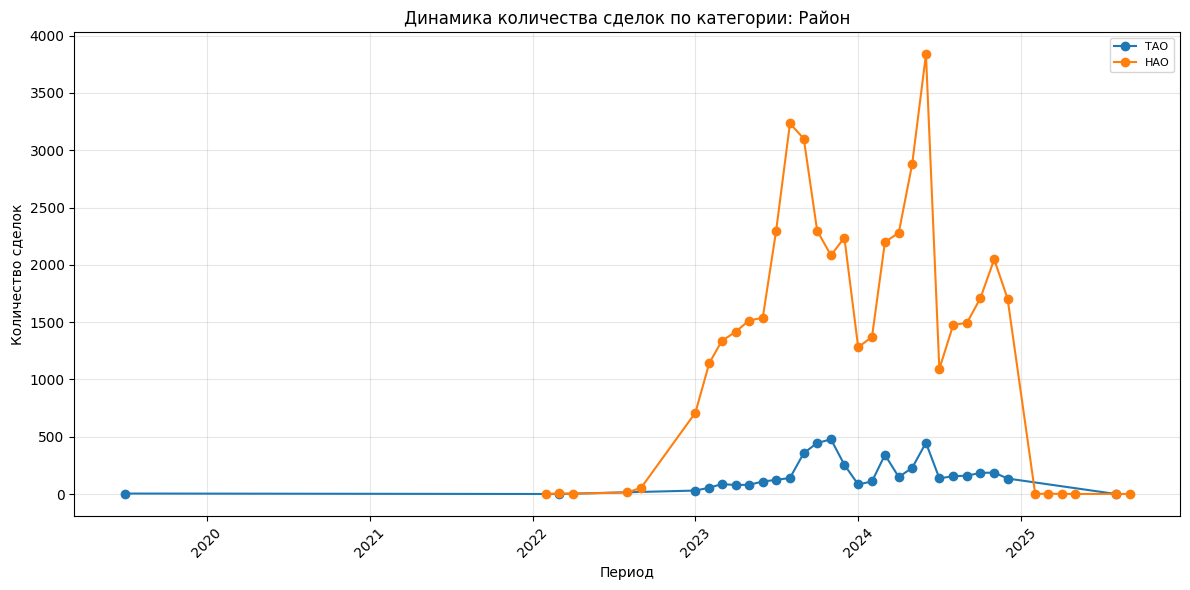

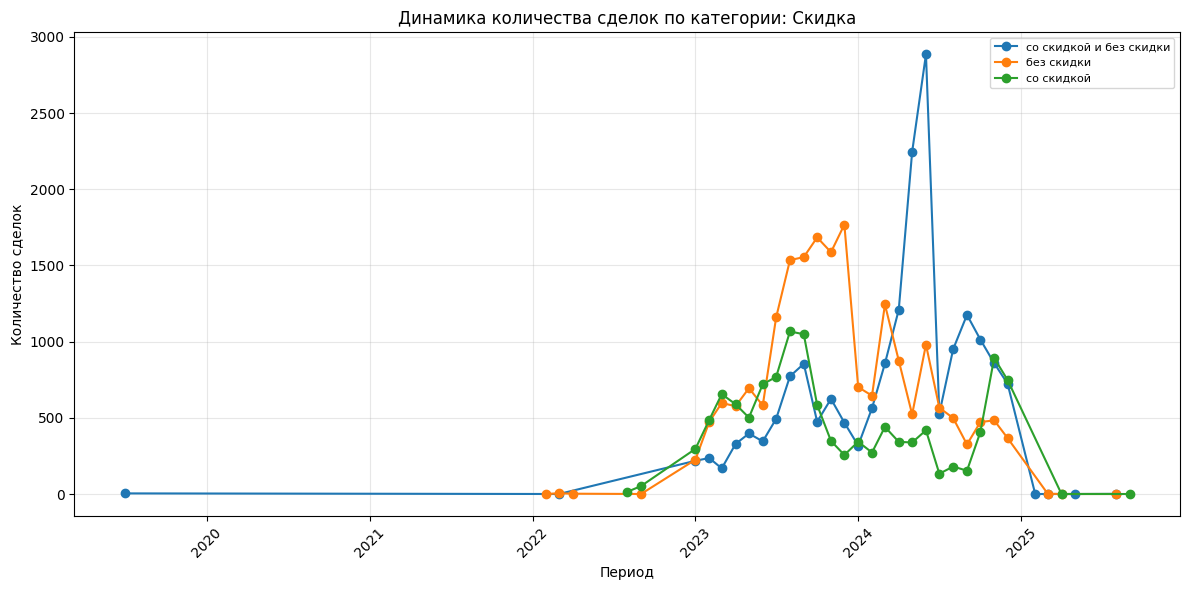

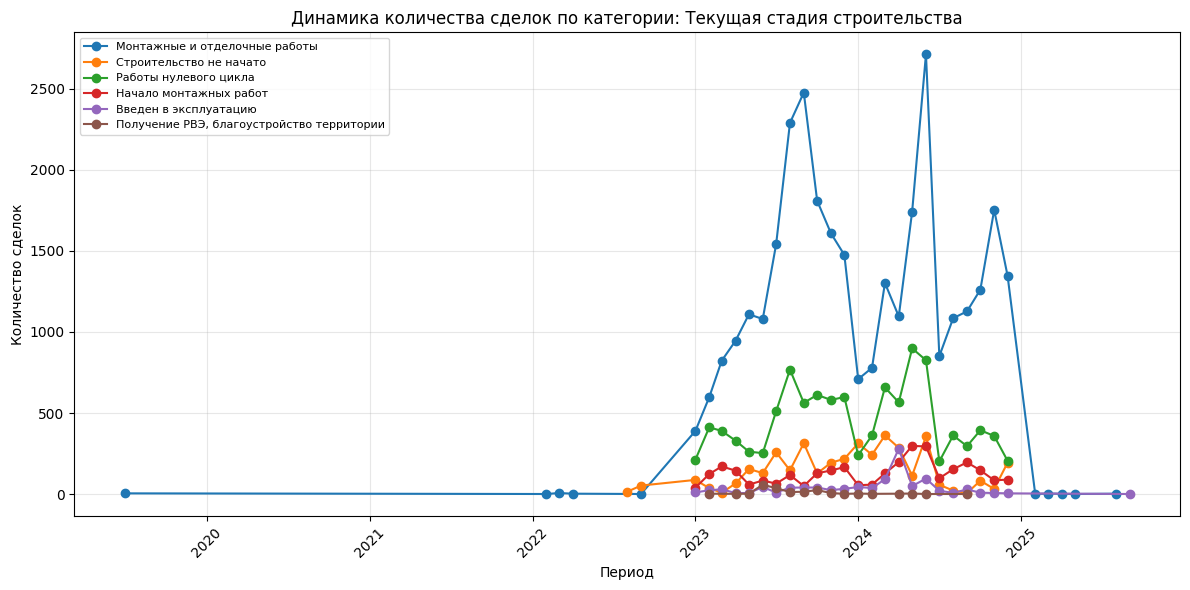

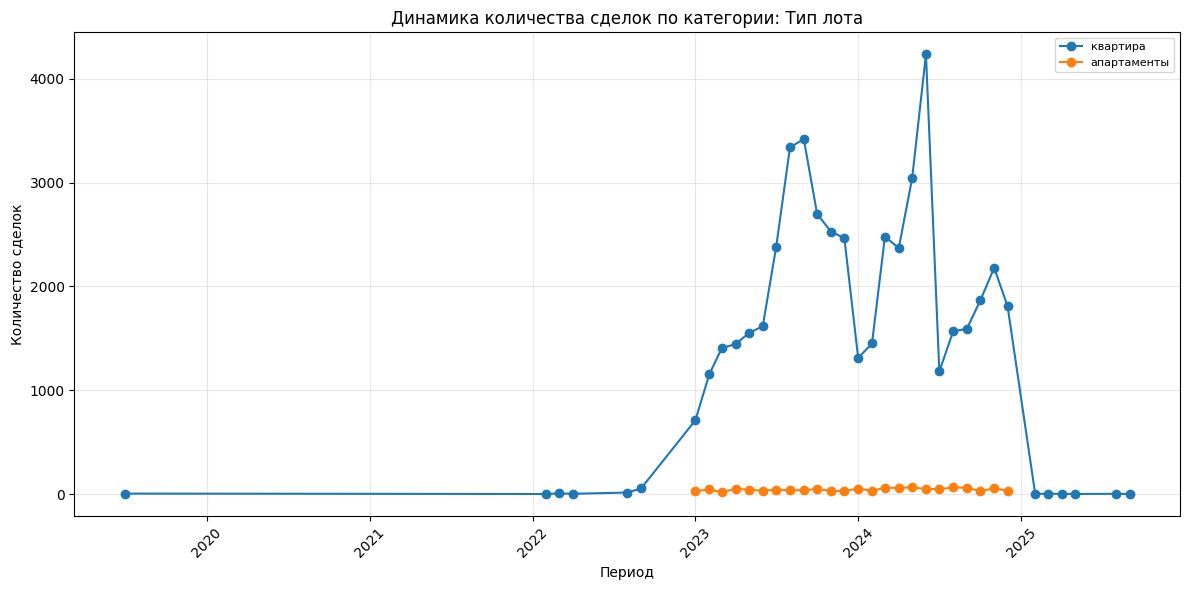

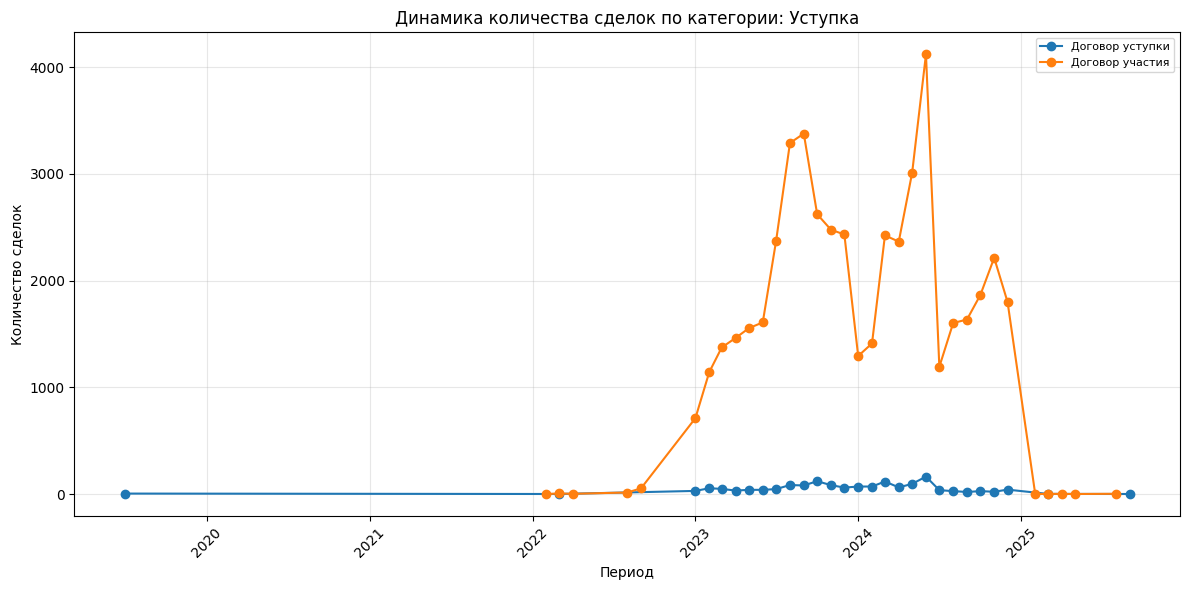

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Создадим временной индекс
df = offers_df

# --- 1. Приводим даты к единому формату ---
df['Дата договора (месяц.год)'] = pd.to_datetime(
    df['Дата договора (месяц.год)'],
    format='mixed',
    errors='coerce'
)

# Проверим, нет ли NaT
print("Проблемные даты:", df['Дата договора (месяц.год)'].isna().sum())

# Вытащим год и месяц
df['year'] = df['Дата договора (месяц.год)'].dt.year
df['month'] = df['Дата договора (месяц.год)'].dt.month

df['period'] = df['Дата договора (месяц.год)'].dt.to_period('M').dt.to_timestamp()

# --- 2. Список категориальных переменных ---
categorical_vars = [
    'Внутренняя отделка',
    'Застройщик',
    'Ипотека',
    'Класс',
    'Количество комнат',
    'Конструкция объекта',
    'Название ЖК',
    'Округ',
    'Покупатель',
    'Продавец',
    'Район',
    'Скидка',
    'Текущая стадия строительства',
    'Тип лота',
    'Уступка'
]

# --- 3. Генератор помесячных графиков ---
for var in categorical_vars:
    
    # группируем по месяцу и категории
    monthly = (
        df.groupby(['period', var])
        .size()
        .reset_index(name='count')
        .sort_values('period')
    )
    
    # рисуем график
    plt.figure(figsize=(12, 6))
    
    for category in monthly[var].unique():
        subset = monthly[monthly[var] == category]
        plt.plot(subset['period'], subset['count'], marker='o', label=str(category))
    
    plt.title(f'Динамика количества сделок по категории: {var}')
    plt.xlabel('Период')
    plt.ylabel('Количество сделок')
    plt.xticks(rotation=45)
    plt.legend(loc='best', fontsize=8)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

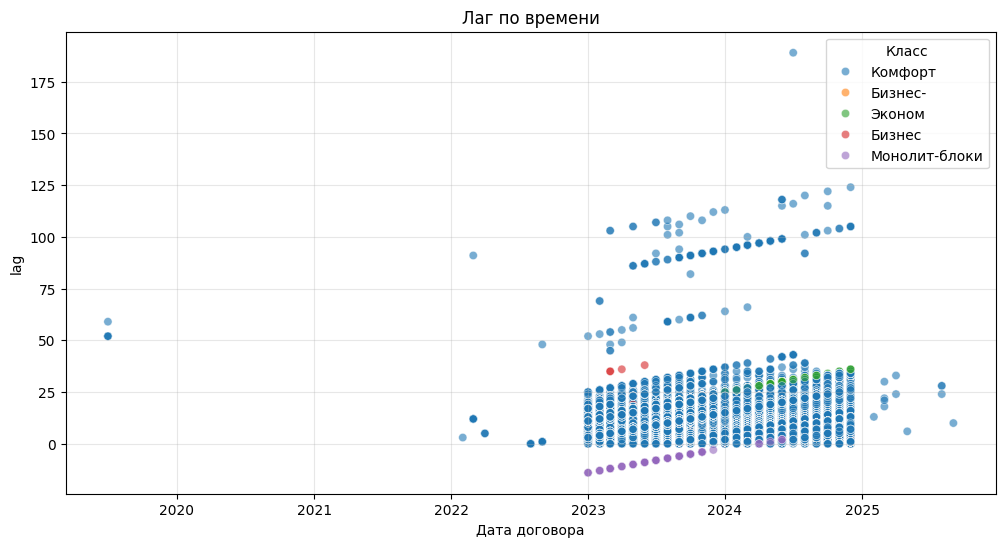

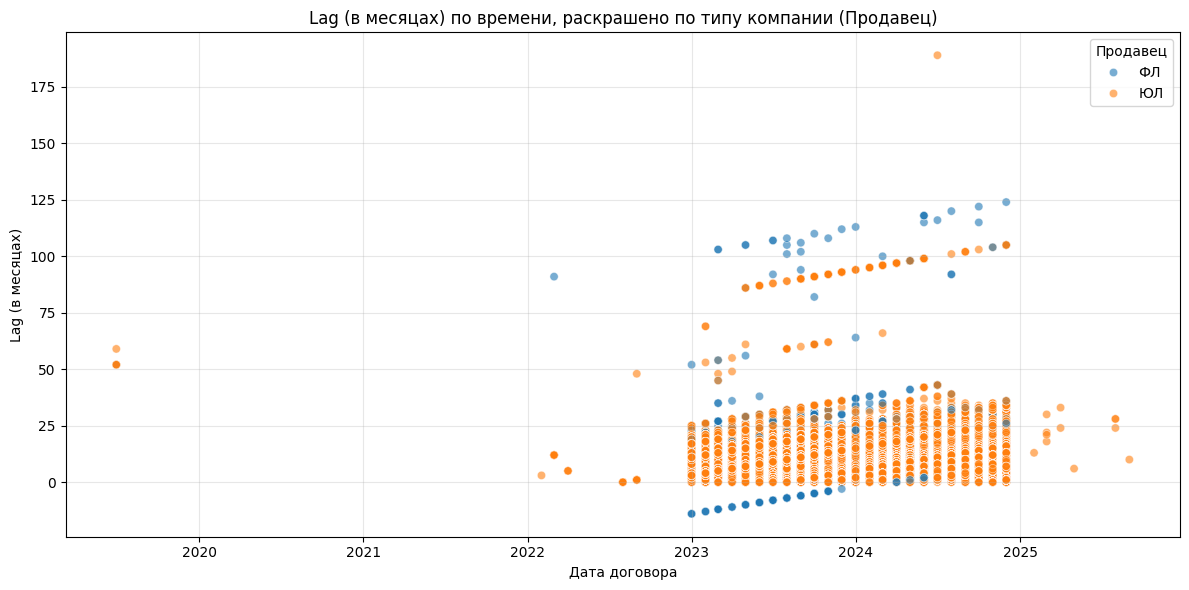

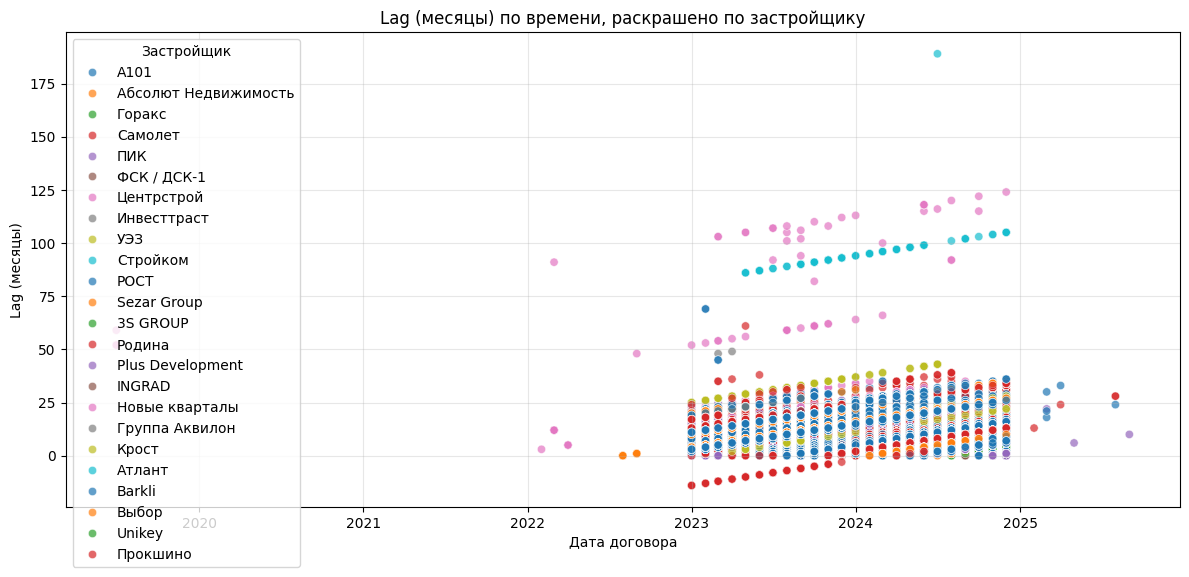

In [19]:
import seaborn as sns

df['Дата начала продаж'] = pd.to_datetime(
    df['Дата начала продаж'],
    format='mixed',
    errors='coerce'
)

df['lag_months'] = (
    (df['Дата договора (месяц.год)'].dt.year - df['Дата начала продаж'].dt.year) * 12 +
    (df['Дата договора (месяц.год)'].dt.month - df['Дата начала продаж'].dt.month)
)

plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df,
    x='Дата договора (месяц.год)',
    y='lag_months',          # или 'lag_days'
    hue='Класс',             # цвет по классу объекта
    palette='tab10',         # красивая палитра
    alpha=0.6
)
plt.title("Лаг по времени")
plt.xlabel("Дата договора")
plt.ylabel("lag")
plt.grid(alpha=0.3)
plt.show()

plt.figure(figsize=(12, 6))

sns.scatterplot(
    data=df,
    x='Дата договора (месяц.год)',
    y='lag_months',
    hue='Продавец',       # ← цвет по типу компании
    palette='tab10',
    alpha=0.6
)

plt.title("Lag (в месяцах) по времени, раскрашено по типу компании (Продавец)")
plt.xlabel("Дата договора")
plt.ylabel("Lag (в месяцах)")
plt.grid(alpha=0.3)
plt.legend(title='Продавец', loc='best')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))

sns.scatterplot(
    data=df,
    x='Дата договора (месяц.год)',
    y='lag_months',
    hue='Застройщик',        # ← ЦВЕТ ПО НАЗВАНИЮ КОМПАНИИ
    palette='tab10',
    alpha=0.7
)

plt.title("Lag (месяцы) по времени, раскрашено по застройщику")
plt.xlabel("Дата договора")
plt.ylabel("Lag (месяцы)")
plt.grid(alpha=0.3)
plt.legend(title='Застройщик', loc='best')
plt.tight_layout()
plt.show()


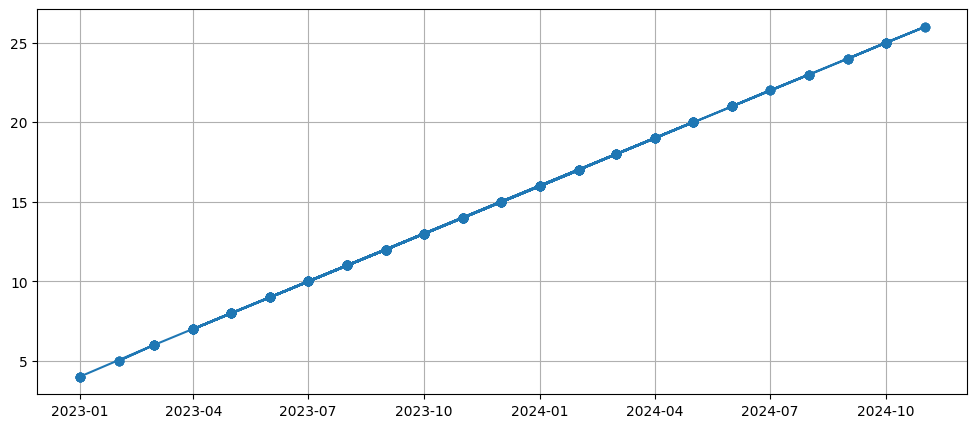

In [18]:
sample = df[df['ID корпуса'] == '93301f7eecabc7036d7ced8e45699ab1']   # подставь любой

plt.figure(figsize=(12,5))
plt.plot(sample['Дата договора (месяц.год)'], sample['lag_months'], 'o-')
plt.grid(True)
plt.show()

C:\Users\leofaraf\AppData\Local\Temp\ipykernel_26976\4291611459.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ur['Дата ввода в эксплуатацию'] = pd.to_datetime(
C:\Users\leofaraf\AppData\Local\Temp\ipykernel_26976\4291611459.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ur['start_period'] = df_ur['Дата ввода в эксплуатацию'].dt.to_period('M')


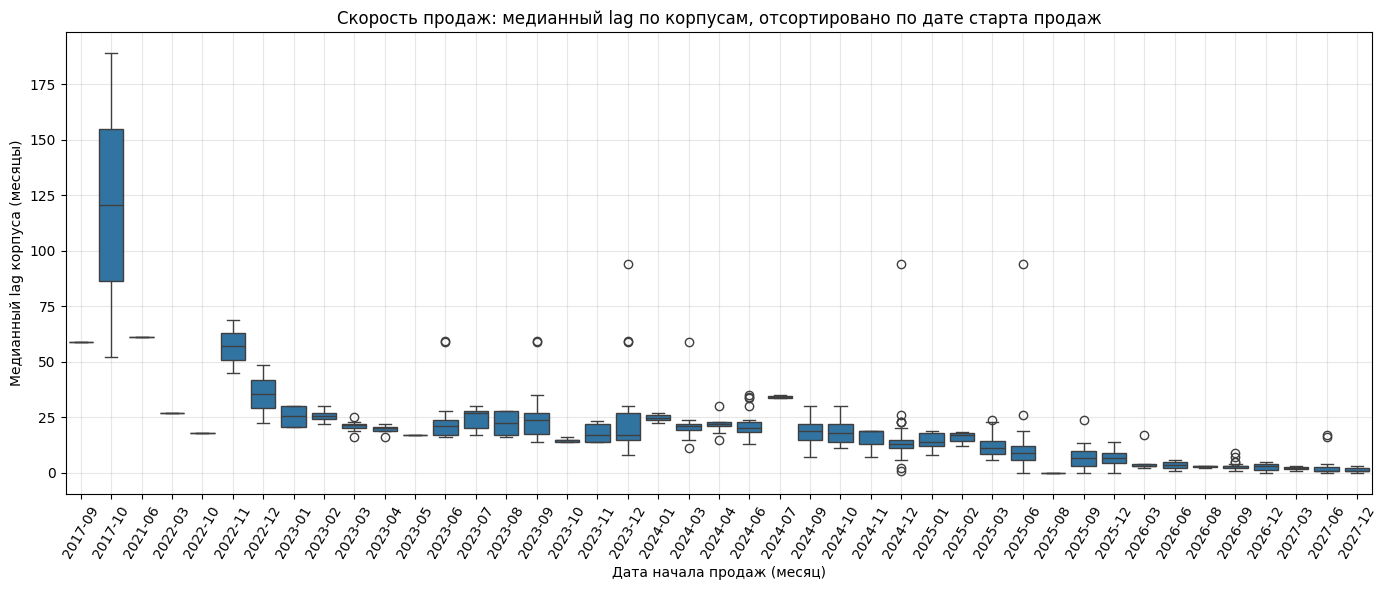

In [ ]:
df_ur = df[df['Продавец'] == 'ЮЛ']

df_ur['Дата ввода в эксплуатацию'] = pd.to_datetime(
    df['Дата ввода в эксплуатацию'], 
    format='mixed',
    errors='coerce'
)

df_ur['start_period'] = df_ur['Дата ввода в эксплуатацию'].dt.to_period('M')
median_lag_by_corpus = (
    df_ur.groupby(['ID корпуса'])['lag_months']
    .median()
    .reset_index()
)
corp_start = df_ur[['ID корпуса', 'start_period']].drop_duplicates()

median_lag_by_corpus = median_lag_by_corpus.merge(corp_start, on='ID корпуса')

# 1. Преобразуем start_period в категорию с правильным порядком
sorted_periods = sorted(median_lag_by_corpus['start_period'].unique())

median_lag_by_corpus['start_period'] = pd.Categorical(
    median_lag_by_corpus['start_period'],
    categories=sorted_periods,
    ordered=True
)

# 2. Строим отсортированный график
plt.figure(figsize=(14, 6))

sns.boxplot(
    data=median_lag_by_corpus.sort_values('start_period'),
    x='start_period',
    y='lag_months'
)

plt.title("Скорость продаж: медианный lag по корпусам, отсортировано по дате старта продаж")
plt.xlabel("Дата начала продаж (месяц)")
plt.ylabel("Дата ввода в эксплуатацию")
plt.xticks(rotation=60)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [5]:
import pandas as pd
import numpy as np

# Приведение дат к datetime (надёжно)
df['Дата начала продаж'] = pd.to_datetime(df['Дата начала продаж'], format='mixed', errors='coerce')
df['Дата ввода в эксплуатацию'] = pd.to_datetime(df['Дата ввода в эксплуатацию'], format='mixed', errors='coerce')
df['Дата договора (месяц.год)'] = pd.to_datetime(df['Дата договора (месяц.год)'], format='mixed', errors='coerce')

# --- Lag продаж (месяцы) ---
df['lag_sales'] = (
    (df['Дата договора (месяц.год)'].dt.year - df['Дата начала продаж'].dt.year) * 12 +
    (df['Дата договора (месяц.год)'].dt.month - df['Дата начала продаж'].dt.month)
)

# --- Lag строительства (месяцы) ---
df['lag_build'] = (
    (df['Дата ввода в эксплуатацию'].dt.year - df['Дата начала продаж'].dt.year) * 12 +
    (df['Дата ввода в эксплуатацию'].dt.month - df['Дата начала продаж'].dt.month)
)


In [33]:
df = df[(df['lag_sales'] >= 0) & (df['lag_build'] >= 0)]


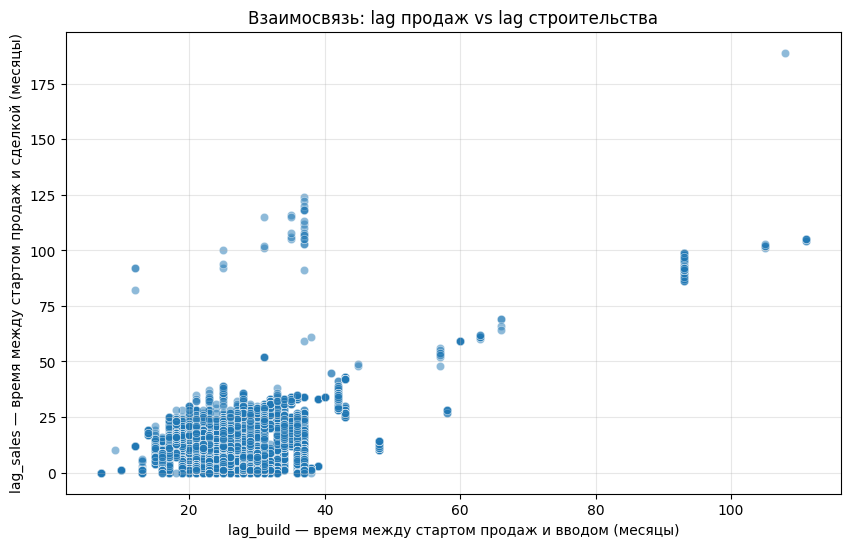

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=df,
    x='lag_build',
    y='lag_sales',
    alpha=0.5
)

plt.title("Взаимосвязь: lag продаж vs lag строительства")
plt.xlabel("lag_build — время между стартом продаж и вводом (месяцы)")
plt.ylabel("lag_sales — время между стартом продаж и сделкой (месяцы)")
plt.grid(alpha=0.3)
plt.show()


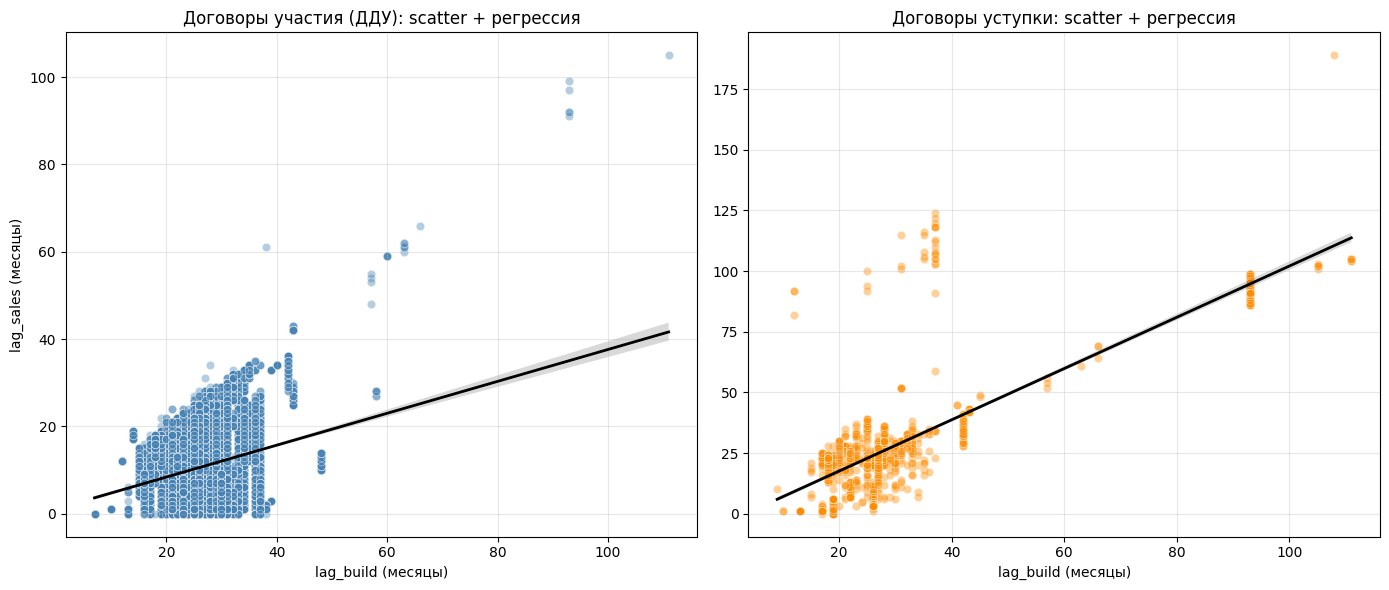

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Фильтры по типу договора
df_ust = df[df['Уступка'] == 'Договор уступки']
df_ddo = df[df['Уступка'] == 'Договор участия']

plt.figure(figsize=(14,6))

# --- ДДУ (первичный рынок) ---
plt.subplot(1, 2, 1)
sns.scatterplot(
    data=df_ddo,
    x='lag_build',
    y='lag_sales',
    alpha=0.4,
    color='steelblue'
)
sns.regplot(
    data=df_ddo,
    x='lag_build',
    y='lag_sales',
    scatter=False,
    color='black',
    line_kws={'linewidth':2}
)
plt.title("Договоры участия (ДДУ): scatter + регрессия")
plt.xlabel("lag_build (месяцы)")
plt.ylabel("lag_sales (месяцы)")
plt.grid(alpha=0.3)


# --- Уступки (вторичный рынок) ---
plt.subplot(1, 2, 2)
sns.scatterplot(
    data=df_ust,
    x='lag_build',
    y='lag_sales',
    alpha=0.4,
    color='darkorange'
)
sns.regplot(
    data=df_ust,
    x='lag_build',
    y='lag_sales',
    scatter=False,
    color='black',
    line_kws={'linewidth':2}
)
plt.title("Договоры уступки: scatter + регрессия")
plt.xlabel("lag_build (месяцы)")
plt.ylabel("")
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


<Figure size 1400x600 with 0 Axes>

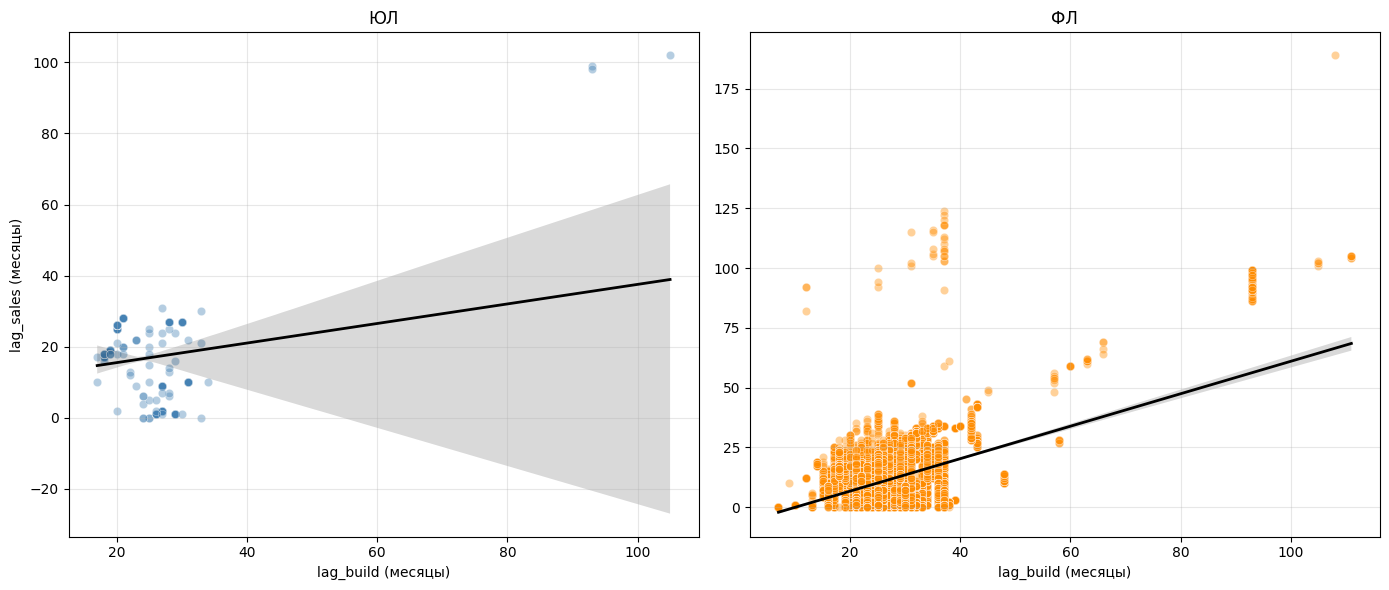

In [12]:
plt.figure(figsize=(14,6))

import matplotlib.pyplot as plt
import seaborn as sns

# Фильтры по типу договора
df_ust = df[df['Покупатель'] == 'ФЛ']
df_ddo = df[df['Покупатель'] == 'ЮЛ']

plt.figure(figsize=(14,6))

# --- ДДУ (первичный рынок) ---
plt.subplot(1, 2, 1)
sns.scatterplot(
    data=df_ddo,
    x='lag_build',
    y='lag_sales',
    alpha=0.4,
    color='steelblue'
)
sns.regplot(
    data=df_ddo,
    x='lag_build',
    y='lag_sales',
    scatter=False,
    color='black',
    line_kws={'linewidth':2}
)
plt.title("ЮЛ")
plt.xlabel("lag_build (месяцы)")
plt.ylabel("lag_sales (месяцы)")
plt.grid(alpha=0.3)


# --- Уступки (вторичный рынок) ---
plt.subplot(1, 2, 2)
sns.scatterplot(
    data=df_ust,
    x='lag_build',
    y='lag_sales',
    alpha=0.4,
    color='darkorange'
)
sns.regplot(
    data=df_ust,
    x='lag_build',
    y='lag_sales',
    scatter=False,
    color='black',
    line_kws={'linewidth':2}
)
plt.title("ФЛ")
plt.xlabel("lag_build (месяцы)")
plt.ylabel("")
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()



C:\Users\leofaraf\AppData\Local\Temp\ipykernel_26976\2215705600.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Дата начала продаж'] = pd.to_datetime(df['Дата начала продаж'], format='mixed', errors='coerce')
C:\Users\leofaraf\AppData\Local\Temp\ipykernel_26976\2215705600.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Дата ввода в эксплуатацию'] = pd.to_datetime(df['Дата ввода в эксплуатацию'], format='mixed', errors='coerce')
C:\Users\leofaraf\AppData\Local\Temp\ipykernel_26976\2215705600.

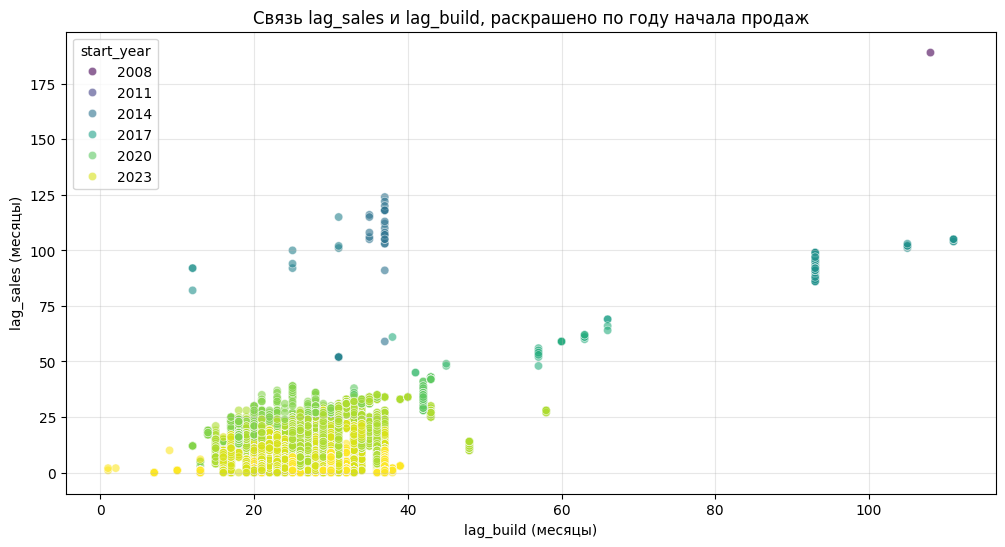


Корреляции lag_sales vs lag_build внутри каждого года старта:

                      lag_sales      corr
start_year                               
2008       lag_sales        NaN       NaN
           lag_build        NaN       NaN
2014       lag_sales   1.000000 -0.065759
           lag_build  -0.065759  1.000000
2015       lag_sales   1.000000 -0.377365
           lag_build  -0.377365  1.000000
2016       lag_sales   1.000000  0.371139
           lag_build   0.371139  1.000000
2017       lag_sales        NaN       NaN
           lag_build        NaN       NaN
2018       lag_sales   1.000000  0.371919
           lag_build   0.371919  1.000000
2019       lag_sales   1.000000  0.980196
           lag_build   0.980196  1.000000
2020       lag_sales   1.000000  0.700896
           lag_build   0.700896  1.000000
2021       lag_sales   1.000000  0.488355
           lag_build   0.488355  1.000000
2022       lag_sales   1.000000  0.186890
           lag_build   0.186890  1.000000
2023       l

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Приводим даты ---
df['Дата начала продаж'] = pd.to_datetime(df['Дата начала продаж'], format='mixed', errors='coerce')
df['Дата ввода в эксплуатацию'] = pd.to_datetime(df['Дата ввода в эксплуатацию'], format='mixed', errors='coerce')
df['Дата договора (месяц.год)'] = pd.to_datetime(df['Дата договора (месяц.год)'], format='mixed', errors='coerce')

# --- 2. LAG SALES ---
df['lag_sales'] = (
    (df['Дата договора (месяц.год)'].dt.year - df['Дата начала продаж'].dt.year) * 12 +
    (df['Дата договора (месяц.год)'].dt.month - df['Дата начала продаж'].dt.month)
)

# --- 3. LAG BUILD ---
df['lag_build'] = (
    (df['Дата ввода в эксплуатацию'].dt.year - df['Дата начала продаж'].dt.year) * 12 +
    (df['Дата ввода в эксплуатацию'].dt.month - df['Дата начала продаж'].dt.month)
)

# --- убираем невозможные значения ---
df = df[(df['lag_sales'] >= 0) & (df['lag_build'] >= 0)]

# --- 4. Год старта продаж ---
df['start_year'] = df['Дата начала продаж'].dt.year

# --- 5. scatterplot lag_sales vs lag_build по годам ---
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df,
    x='lag_build',
    y='lag_sales',
    hue='start_year',
    palette='viridis',
    alpha=0.6
)
plt.title("Связь lag_sales и lag_build, раскрашено по году начала продаж")
plt.xlabel("lag_build (месяцы)")
plt.ylabel("lag_sales (месяцы)")
plt.grid(alpha=0.3)
plt.show()


# --- 6. Корреляции внутри годов ---
corrs = (
    df.groupby('start_year')[['lag_sales','lag_build']]
    .corr()
    .rename(columns={'lag_build':'corr'})
)
print("\nКорреляции lag_sales vs lag_build внутри каждого года старта:\n")
print(corrs)

# --- 7. Простая регрессия внутри годов ---
import statsmodels.api as sm

print("\nРегрессии lag_sales ~ lag_build по годам старта:\n")

for year, sub in df.groupby('start_year'):
    if len(sub) > 10:  # чтобы была выборка
        X = sm.add_constant(sub['lag_build'])
        y = sub['lag_sales']
        model = sm.OLS(y, X).fit()
        print(f"--- {year} ---")
        print(model.summary())
        print()


C:\Users\leofaraf\AppData\Local\Temp\ipykernel_26976\526206059.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['start_period'] = df['Дата начала продаж'].dt.to_period('M')


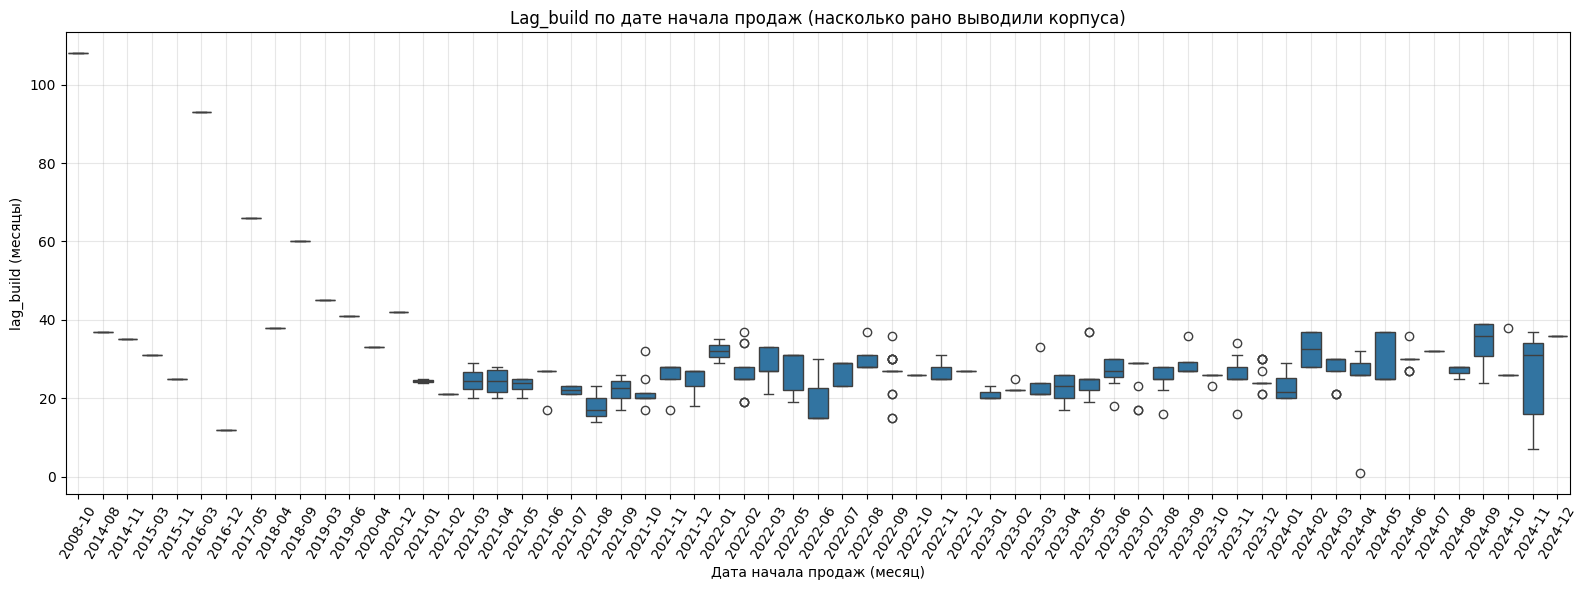

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Округляем дату начала продаж до месяца
df['start_period'] = df['Дата начала продаж'].dt.to_period('M')

# Считаем median lag_build по корпусам
lag_build_by_corpus = (
    df.groupby(['ID корпуса'])[['lag_build']]
    .median()
    .reset_index()
)

# Добавляем период старта продаж
corp_start = df[['ID корпуса', 'start_period']].drop_duplicates()
lag_build_by_corpus = lag_build_by_corpus.merge(corp_start, on='ID корпуса')

# Приводим start_period к отсортированной категории
sorted_periods = sorted(lag_build_by_corpus['start_period'].unique())
lag_build_by_corpus['start_period'] = pd.Categorical(
    lag_build_by_corpus['start_period'],
    categories=sorted_periods,
    ordered=True
)

# Строим график
plt.figure(figsize=(16, 6))
sns.boxplot(
    data=lag_build_by_corpus.sort_values('start_period'),
    x='start_period',
    y='lag_build'
)

plt.title("Lag_build по дате начала продаж (насколько рано выводили корпуса)")
plt.xlabel("Дата начала продаж (месяц)")
plt.ylabel("lag_build (месяцы)")
plt.xticks(rotation=60)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


C:\Users\leofaraf\AppData\Local\Temp\ipykernel_26976\3880493131.py:9: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df.pivot_table(


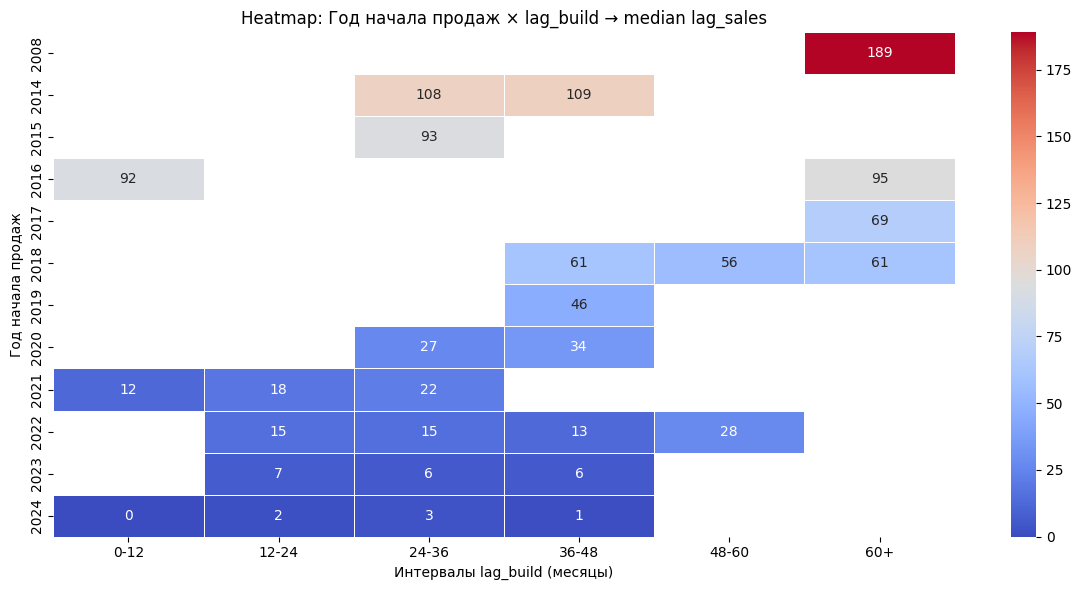

In [37]:
# --- Биннинг lag_build ---
# интервалы: 0–12, 12–24, ..., 60+
bins = [0, 12, 24, 36, 48, 60, 120]
labels = ["0-12", "12-24", "24-36", "36-48", "48-60", "60+"]

df['lag_build_bin'] = pd.cut(df['lag_build'], bins=bins, labels=labels, include_lowest=True)

# --- Считаем медианный lag_sales ---
pivot = df.pivot_table(
    index='start_year',
    columns='lag_build_bin',
    values='lag_sales',
    aggfunc='median'
)

# --- Heatmap ---
plt.figure(figsize=(12, 6))
sns.heatmap(
    pivot,
    annot=True,
    fmt=".0f",
    cmap="coolwarm",
    linewidths=.5
)

plt.title("Heatmap: Год начала продаж × lag_build → median lag_sales")
plt.xlabel("Интервалы lag_build (месяцы)")
plt.ylabel("Год начала продаж")
plt.tight_layout()
plt.show()

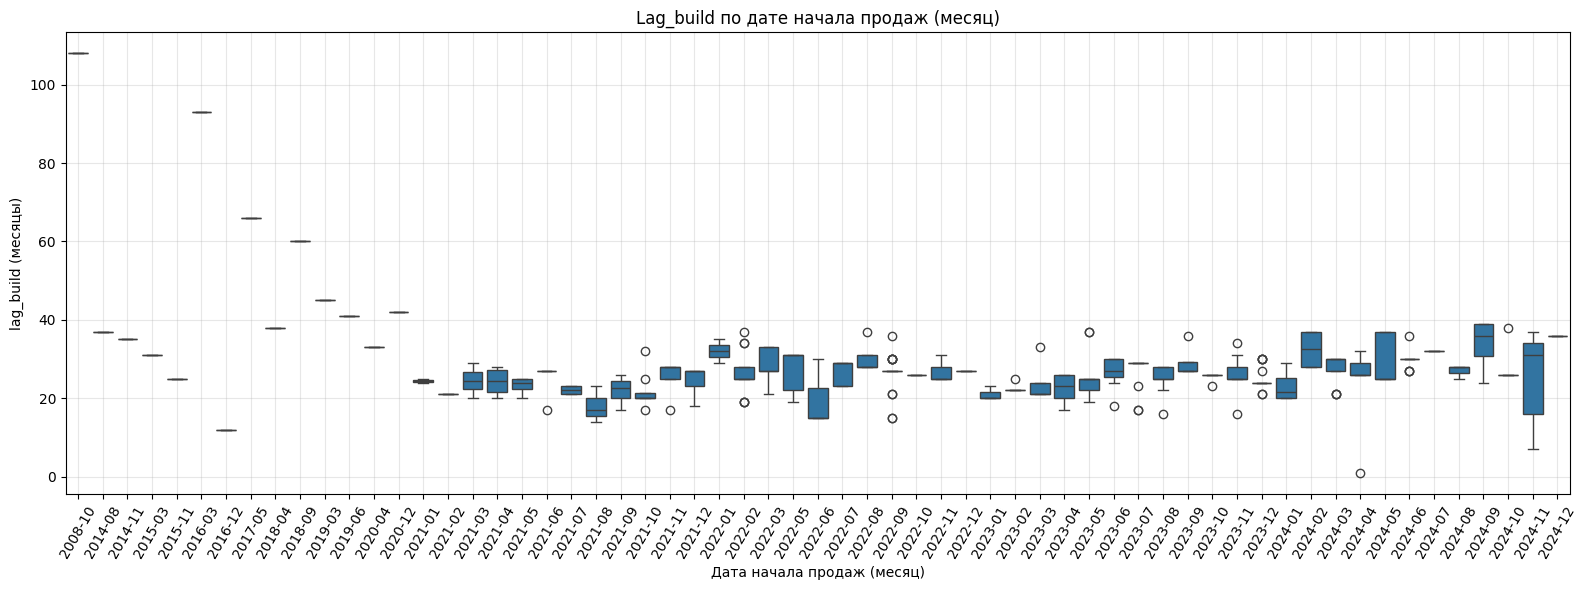

In [38]:
# считаем медианный lag_build по корпусам
lag_build_by_corpus = (
    df.groupby(['ID корпуса'])[['lag_build']]
      .median()
      .reset_index()
)

# добавляем месяц старта
corp_start = df[['ID корпуса','start_period']].drop_duplicates()
lag_build_by_corpus = lag_build_by_corpus.merge(corp_start, on='ID корпуса')

# сортируем периоды
sorted_periods = sorted(lag_build_by_corpus['start_period'].unique())
lag_build_by_corpus['start_period'] = pd.Categorical(
    lag_build_by_corpus['start_period'],
    categories=sorted_periods,
    ordered=True
)

# график
plt.figure(figsize=(16,6))
sns.boxplot(
    data=lag_build_by_corpus.sort_values('start_period'),
    x='start_period',
    y='lag_build'
)
plt.title("Lag_build по дате начала продаж (месяц)")
plt.xlabel("Дата начала продаж (месяц)")
plt.ylabel("lag_build (месяцы)")
plt.xticks(rotation=60)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

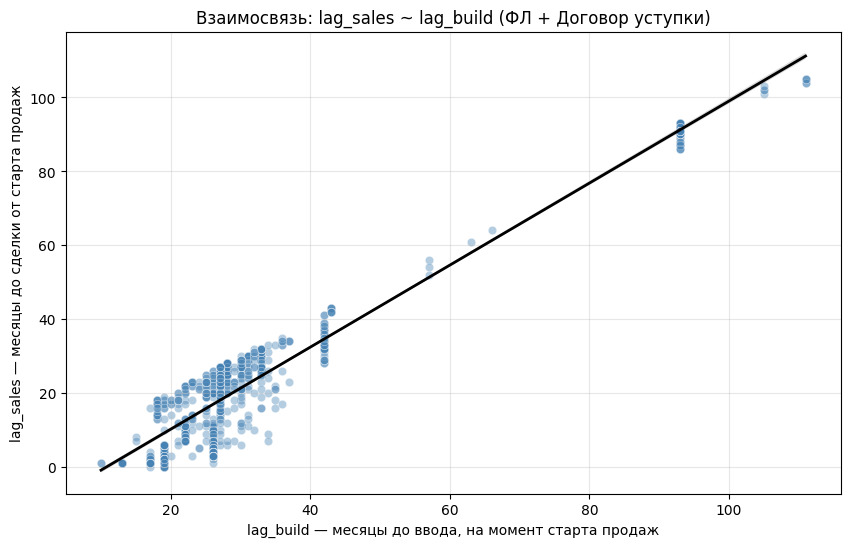

                            OLS Regression Results                            
Dep. Variable:              lag_sales   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     9238.
Date:                Wed, 26 Nov 2025   Prob (F-statistic):               0.00
Time:                        19:55:56   Log-Likelihood:                -2941.5
No. Observations:                 880   AIC:                             5887.
Df Residuals:                     878   BIC:                             5897.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.9935      0.441    -27.221      0.0

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# --- 1. График scatter + регрессия ---
plt.figure(figsize=(10, 6))

df_ust = df[df['Уступка'] == 'Договор уступки']
df_ust = df_ust[df_ust['Покупатель'] == 'ФЛ']
df_ust = df_ust[df_ust['Дата договора (месяц.год)'] < df_ust['Дата ввода в эксплуатацию']]

sns.scatterplot(
    data=df_ust,
    x='lag_build',
    y='lag_sales',
    alpha=0.4,
    color='steelblue'
)

# Линейная регрессия (визуально)
sns.regplot(
    data=df_ust,
    x='lag_build',
    y='lag_sales',
    scatter=False,
    color='black',
    line_kws={'linewidth':2}
)

plt.title("Взаимосвязь: lag_sales ~ lag_build (ФЛ + Договор уступки)")
plt.xlabel("lag_build — месяцы до ввода, на момент старта продаж")
plt.ylabel("lag_sales — месяцы до сделки от старта продаж")
plt.grid(alpha=0.3)
plt.show()


# --- 2. Статистическая регрессия OLS ---
X = sm.add_constant(df_ust['lag_build'])  # добавляем intercept
y = df_ust['lag_sales']

model = sm.OLS(y, X).fit()

print(model.summary())

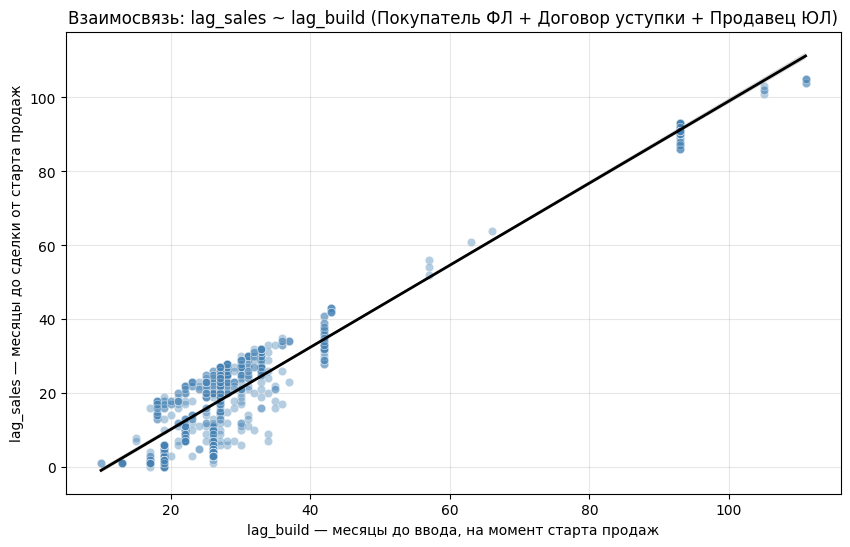

                            OLS Regression Results                            
Dep. Variable:              lag_sales   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     9238.
Date:                Wed, 26 Nov 2025   Prob (F-statistic):               0.00
Time:                        21:14:25   Log-Likelihood:                -2941.5
No. Observations:                 880   AIC:                             5887.
Df Residuals:                     878   BIC:                             5897.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.9935      0.441    -27.221      0.0

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# --- 1. График scatter + регрессия ---
plt.figure(figsize=(10, 6))

df_ust = df[df['Уступка'] == 'Договор уступки']
df_ust = df_ust[df_ust['Покупатель'] == 'ФЛ']
df_ust = df_ust[df_ust['Дата договора (месяц.год)'] < df_ust['Дата ввода в эксплуатацию']]

sns.scatterplot(
    data=df_ust,
    x='lag_build',
    y='lag_sales',
    alpha=0.4,
    color='steelblue'
)

# Линейная регрессия (визуально)
sns.regplot(
    data=df_ust,
    x='lag_build',
    y='lag_sales',
    scatter=False,
    color='black',
    line_kws={'linewidth':2}
)

plt.title("Взаимосвязь: lag_sales ~ lag_build (Покупатель ФЛ + Договор уступки + Продавец ЮЛ)")
plt.xlabel("lag_build — месяцы до ввода, на момент старта продаж")
plt.ylabel("lag_sales — месяцы до сделки от старта продаж")
plt.grid(alpha=0.3)
plt.show()


# --- 2. Статистическая регрессия OLS ---
X = sm.add_constant(df_ust['lag_build'])  # добавляем intercept
y = df_ust['lag_sales']

model = sm.OLS(y, X).fit()

print(model.summary())

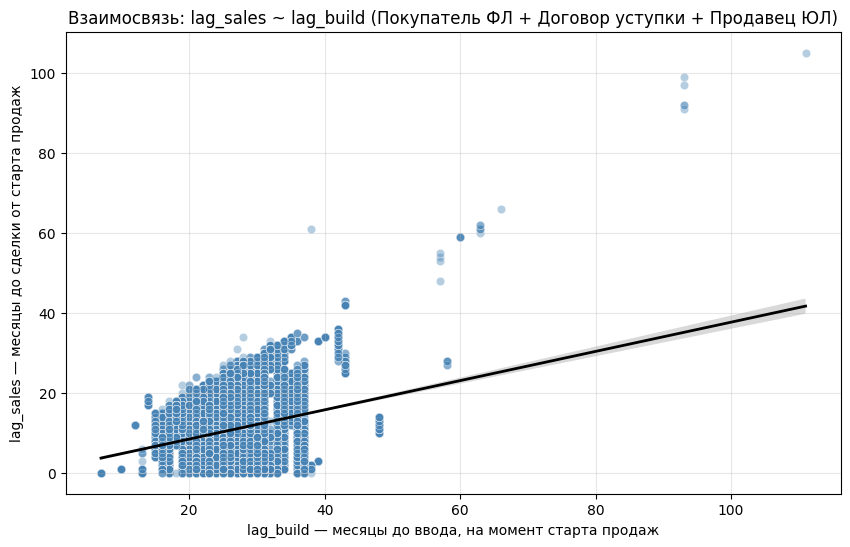

                            OLS Regression Results                            
Dep. Variable:              lag_sales   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     2921.
Date:                Wed, 26 Nov 2025   Prob (F-statistic):               0.00
Time:                        20:34:30   Log-Likelihood:            -1.6990e+05
No. Observations:               49460   AIC:                         3.398e+05
Df Residuals:                   49458   BIC:                         3.398e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0699      0.183      5.844      0.0

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# --- 1. График scatter + регрессия ---
plt.figure(figsize=(10, 6))

df_ust = df[df['Уступка'] != 'Договор уступки']
# df_ust = df_ust[df_ust['Покупатель'] == 'ФЛ']
# df_ust = df_ust[df_ust['Продавец'] == 'ЮЛ']
# df_ust = df_ust[df_ust['Дата договора (месяц.год)'] < df_ust['Дата ввода в эксплуатацию']]

sns.scatterplot(
    data=df_ust,
    x='lag_build',
    y='lag_sales',
    alpha=0.4,
    color='steelblue'
)

# Линейная регрессия (визуально)
sns.regplot(
    data=df_ust,
    x='lag_build',
    y='lag_sales',
    scatter=False,
    color='black',
    line_kws={'linewidth':2}
)

plt.title("Взаимосвязь: lag_sales ~ lag_build (Покупатель ФЛ + Договор уступки + Продавец ЮЛ)")
plt.xlabel("lag_build — месяцы до ввода, на момент старта продаж")
plt.ylabel("lag_sales — месяцы до сделки от старта продаж")
plt.grid(alpha=0.3)
plt.show()


# --- 2. Статистическая регрессия OLS ---
X = sm.add_constant(df_ust['lag_build'])  # добавляем intercept
y = df_ust['lag_sales']

model = sm.OLS(y, X).fit()

print(model.summary())

<Figure size 800x800 with 0 Axes>

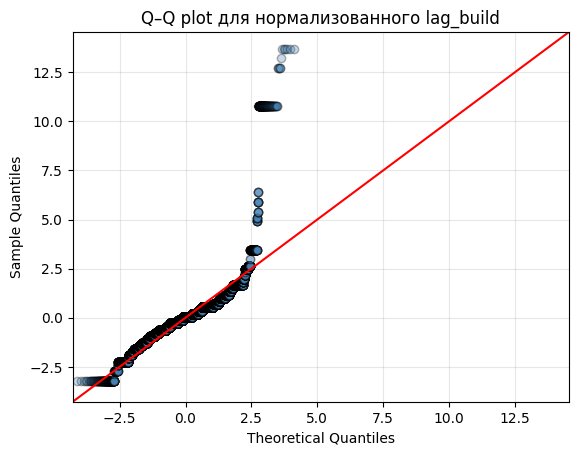

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# --- подготовка данных ---
df_clean = df[df['lag_build'] > 0].copy()

# Z-нормализация lag_build
df_clean['lag_build_norm'] = (
    df_clean['lag_build'] - df_clean['lag_build'].mean()
) / df_clean['lag_build'].std()

# --- Q–Q plot ---
plt.figure(figsize=(8, 8))

sm.qqplot(
    df_clean['lag_build_norm'],
    line='45',
    alpha=0.3,
    markerfacecolor='steelblue',
    markeredgecolor='black'
)

plt.title("Q–Q plot для нормализованного lag_build")
plt.grid(alpha=0.3)
plt.show()


<Figure size 800x800 with 0 Axes>

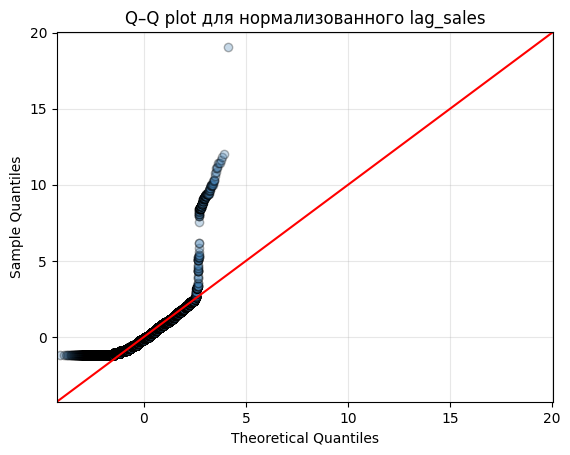

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# --- подготовка данных ---
df_clean = df[df['lag_sales'] > 0].copy()

# нормализация Z-score
df_clean['lag_sales_norm'] = (
    df_clean['lag_sales'] - df_clean['lag_sales'].mean()
) / df_clean['lag_sales'].std()

# --- Q-Q plot ---
plt.figure(figsize=(8, 8))

sm.qqplot(
    df_clean['lag_sales_norm'],
    line='45',       # линия идеальной нормальности
    alpha=0.3,
    markerfacecolor='steelblue',
    markeredgecolor='black'
)

plt.title("Q–Q plot для нормализованного lag_sales")
plt.grid(alpha=0.3)
plt.show()


In [55]:
from scipy.stats import ttest_ind
import numpy as np

# Очистка нулевых лагов
df_clean = df[(df['lag_build'] > 0) & (df['lag_sales'] > 0)].copy()

# Делим на две группы по медиане lag_build
median_build = df_clean['lag_build'].median()
group_low = df_clean[df_clean['lag_build'] <= median_build]['lag_sales']
group_high = df_clean[df_clean['lag_build'] > median_build]['lag_sales']

# Welch t-test: equal_var=False
t_stat, p_val = ttest_ind(group_low, group_high, equal_var=False)

print("=== Welch t-test: влияние lag_build на lag_sales ===")
print(f"t = {t_stat:.4f}")
print(f"p = {p_val:.4e}")
print(f"Median lag_build = {median_build}")

# Интерпретация
if p_val < 0.05:
    print("\n✔ Вывод: средние lag_sales в группах значимо различаются.")
    print("Это подтверждает, что lag_build влияет на lag_sales.")
else:
    print("\n✘ Вывод: статистически значимых различий не найдено.")


=== Welch t-test: влияние lag_build на lag_sales ===
t = -22.3326
p = 1.4147e-109
Median lag_build = 27.0

✔ Вывод: средние lag_sales в группах значимо различаются.
Это подтверждает, что lag_build влияет на lag_sales.


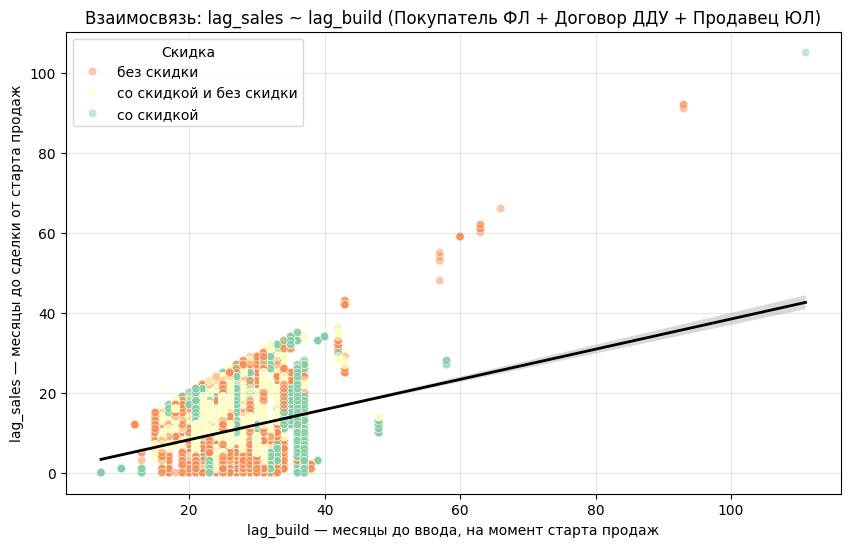

                            OLS Regression Results                            
Dep. Variable:              lag_sales   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     3097.
Date:                Wed, 26 Nov 2025   Prob (F-statistic):               0.00
Time:                        21:26:55   Log-Likelihood:            -1.6710e+05
No. Observations:               48781   AIC:                         3.342e+05
Df Residuals:                   48779   BIC:                         3.342e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6612      0.184      3.597      0.0

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# --- 1. График scatter + регрессия ---
plt.figure(figsize=(10, 6))

df_ust = df[df['Уступка'] != 'Договор уступки']
df_ust = df_ust[df_ust['Покупатель'] == 'ФЛ']
df_ust = df_ust[df_ust['Продавец'] == 'ЮЛ']
df_ust = df_ust[df_ust['Дата договора (месяц.год)'] < df_ust['Дата ввода в эксплуатацию']]

sns.scatterplot(
    data=df_ust,
    x='lag_build',
    y='lag_sales',
    hue='Скидка',             # ← Цвет по классу жилья
    palette='Spectral',
    alpha=0.5
)
# Линейная регрессия (визуально)
sns.regplot(
    data=df_ust,
    x='lag_build',
    y='lag_sales',
    scatter=False,
    color='black',
    line_kws={'linewidth':2}
)

plt.title("Взаимосвязь: lag_sales ~ lag_build (Покупатель ФЛ + Договор ДДУ + Продавец ЮЛ)")
plt.xlabel("lag_build — месяцы до ввода, на момент старта продаж")
plt.ylabel("lag_sales — месяцы до сделки от старта продаж")
plt.grid(alpha=0.3)
plt.show()


# --- 2. Статистическая регрессия OLS ---
X = sm.add_constant(df_ust['lag_build'])  # добавляем intercept
y = df_ust['lag_sales']

model = sm.OLS(y, X).fit()

print(model.summary())

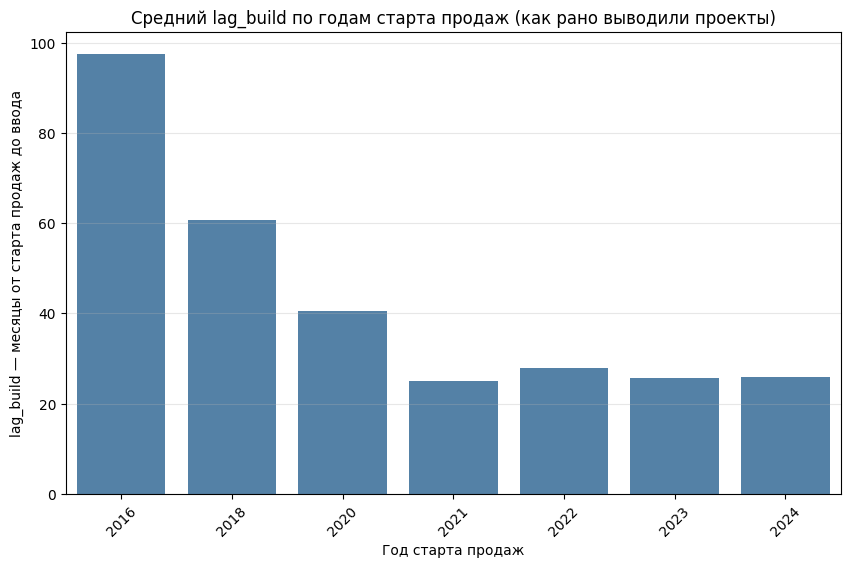

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Готовим данные ---

# Извлекаем год старта продаж
df_ust['year_start_sales'] = df_ust['Дата начала продаж'].dt.year

# Средний lag_build по году
df_lag_build = (
    df_ust.groupby('year_start_sales')['lag_build']
          .mean()
          .reset_index()
)

# --- 2. Строим график ---

plt.figure(figsize=(10, 6))

sns.barplot(
    data=df_lag_build,
    x='year_start_sales',
    y='lag_build',
    color='steelblue'
)

plt.title("Средний lag_build по годам старта продаж (как рано выводили проекты)")
plt.xlabel("Год старта продаж")
plt.ylabel("lag_build — месяцы от старта продаж до ввода")
plt.grid(axis='y', alpha=0.3)
plt.xticks(rotation=45)

plt.show()


                         ID корпуса  lag_build  median_lag_sales  count_deals
0  002b4f20e97d6ca8ac349b5e2e9e81d3         30               3.0          264
1  0076fc28a53eb506b7fc91475d31dea3         31              11.0           96
2  0081bc4d4059f46b3b42276ba8aee782         23               9.0          312
3  009d5290e93e353bb27e3f01b505f5b7         28               3.0           28
4  013e43142be6303646e81ccd28432986         28              10.0          153


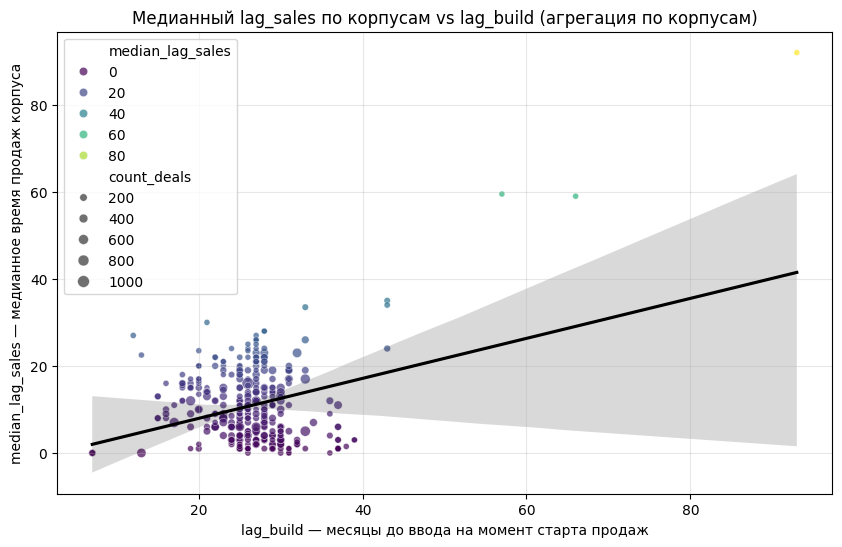

                            OLS Regression Results                            
Dep. Variable:       median_lag_sales   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     46.42
Date:                Wed, 26 Nov 2025   Prob (F-statistic):           3.64e-11
Time:                        21:08:52   Log-Likelihood:                -1399.0
No. Observations:                 392   AIC:                             2802.
Df Residuals:                     390   BIC:                             2810.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2302      1.846     -0.666      0.5

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# --- Фильтр только ДДУ, ФЛ, ЮЛ ---
df_ust = df[df['Уступка'] != 'Договор уступки'].copy()
df_ust = df_ust[df_ust['Покупатель'] == 'ФЛ']
df_ust = df_ust[df_ust['Продавец'] == 'ЮЛ']
df_ust = df_ust[df_ust['Дата договора (месяц.год)'] < df_ust['Дата ввода в эксплуатацию']]

# --- 1. Агрегация на уровне корпуса ---
df_corp = (
    df_ust.groupby("ID корпуса")
    .agg(
        lag_build=("lag_build", "first"),
        median_lag_sales=("lag_sales", "median"),
        count_deals=("lag_sales", "count")
    )
    .reset_index()
)

print(df_corp.head())

# --- 2. Scatterplot ---
plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=df_corp,
    x='lag_build',
    y='median_lag_sales',
    size='count_deals',   # Опционально — размер точки = кол-во сделок
    hue='median_lag_sales',
    palette='viridis',
    alpha=0.7,
)

# Линейная регрессия по корпусам
sns.regplot(
    data=df_corp,
    x='lag_build',
    y='median_lag_sales',
    scatter=False,
    color='black'
)

plt.title("Медианный lag_sales по корпусам vs lag_build (агрегация по корпусам)")
plt.xlabel("lag_build — месяцы до ввода на момент старта продаж")
plt.ylabel("median_lag_sales — медианное время продаж корпуса")
plt.grid(alpha=0.3)

plt.show()

# --- 3. Регрессия OLS ---
X = sm.add_constant(df_corp['lag_build'])
y = df_corp['median_lag_sales']

model = sm.OLS(y, X).fit()
print(model.summary())


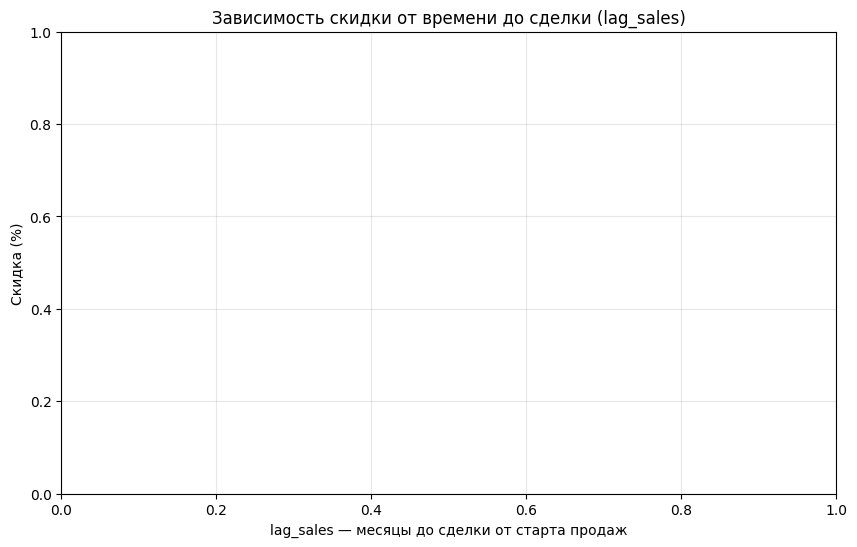

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# Фильтруем только те строки, где есть нормальные значения скидки
df2 = df[(df['lag_sales'] >= 0) & (df['Скидка'].notna())].copy()

# Преобразуем скидку в числовой формат
df2['Скидка_num'] = df2['Скидка'].str.extract(r'(\d+\.?\d*)').astype(float)

plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=df2,
    x='lag_sales',
    y='Скидка_num',
    alpha=0.4,
    color='steelblue'
)

sns.regplot(
    data=df2,
    x='lag_sales',
    y='Скидка_num',
    scatter=False,
    color='black',
    line_kws={'linewidth': 2}
)

plt.title("Зависимость скидки от времени до сделки (lag_sales)")
plt.xlabel("lag_sales — месяцы до сделки от старта продаж")
plt.ylabel("Скидка (%)")
plt.grid(alpha=0.3)
plt.show()


In [76]:
df_log = df.copy()

# Исключаем неопределённые скидки
df_log = df_log[df_log['Скидка'] != 'со скидкой и без скидки']

# Создаём бинарный признак: скидка есть или нет
df_log['discount_flag'] = (df_log['Скидка'] == 'со скидкой').astype(int)

# Убираем некорректные лаги
df_log = df_log[df_log['lag_sales'] >= 0]

import statsmodels.api as sm

X = sm.add_constant(df_log['lag_sales'])  # добавляем интерцепт
y = df_log['discount_flag']

logit_model = sm.Logit(y, X).fit()
print(logit_model.summary())


Optimization terminated successfully.
         Current function value: 0.660585
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:          discount_flag   No. Observations:                32221
Model:                          Logit   Df Residuals:                    32219
Method:                           MLE   Df Model:                            1
Date:                Wed, 26 Nov 2025   Pseudo R-squ.:                0.001314
Time:                        21:25:12   Log-Likelihood:                -21285.
converged:                       True   LL-Null:                       -21313.
Covariance Type:            nonrobust   LLR p-value:                 7.165e-14
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6006      0.017    -36.181      0.000      -0.633      -0.568
lag_sales      0.0084      0.

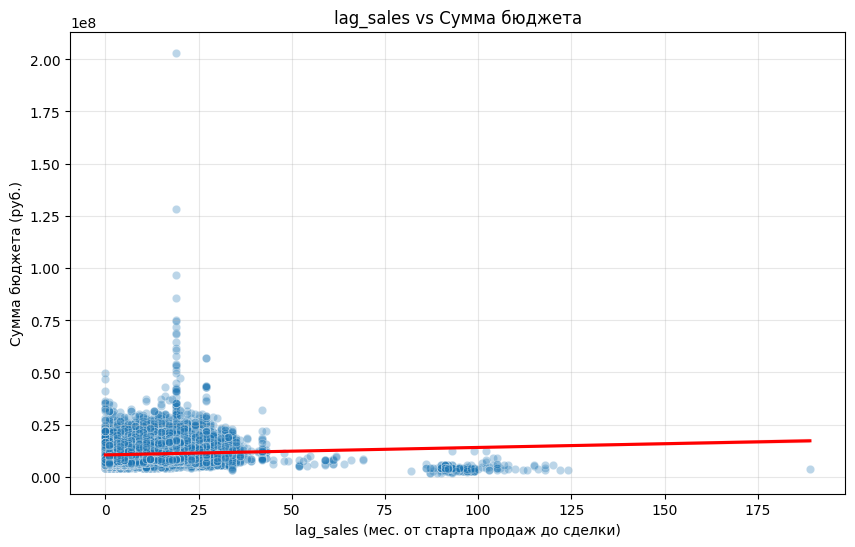

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

df2 = df[(df['lag_sales'] >= 0) & (df['Сумма бюджета'] > 0)].copy()

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df2,
    x='lag_sales',
    y='Сумма бюджета',
    alpha=0.3
)
sns.regplot(
    data=df2,
    x='lag_sales',
    y='Сумма бюджета',
    scatter=False,
    color='red'
)

plt.title("lag_sales vs Сумма бюджета")
plt.xlabel("lag_sales (мес. от старта продаж до сделки)")
plt.ylabel("Сумма бюджета (руб.)")
plt.grid(alpha=0.3)
plt.show()


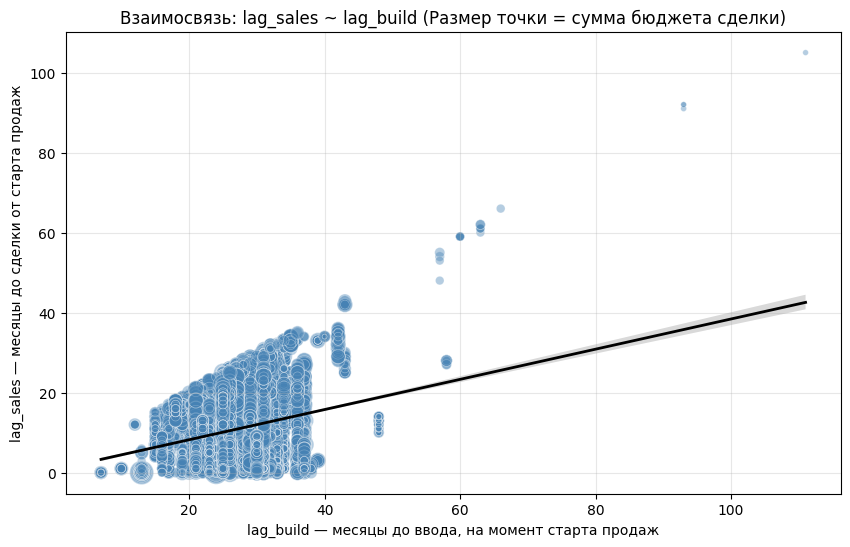

                            OLS Regression Results                            
Dep. Variable:              lag_sales   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     3097.
Date:                Wed, 26 Nov 2025   Prob (F-statistic):               0.00
Time:                        21:30:25   Log-Likelihood:            -1.6710e+05
No. Observations:               48781   AIC:                         3.342e+05
Df Residuals:                   48779   BIC:                         3.342e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6612      0.184      3.597      0.0

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

plt.figure(figsize=(10, 6))

df_ust = df[df['Уступка'] != 'Договор уступки']
df_ust = df_ust[df_ust['Покупатель'] == 'ФЛ']
df_ust = df_ust[df_ust['Продавец'] == 'ЮЛ']
df_ust = df_ust[df_ust['Дата договора (месяц.год)'] < df_ust['Дата ввода в эксплуатацию']]
df_ust = df_ust[df_ust['lag_build'] < 50]

# Размер точки = нормированный бюджет (но без слишком экстремальных значений)
df_ust['budget_norm'] = df_ust['Сумма бюджета'] / df_ust['Сумма бюджета'].max() * 300

sns.scatterplot(
    data=df_ust,
    x='lag_build',
    y='lag_sales',
    size='budget_norm',      # ← размер точки по бюджету
    sizes=(10, 300),         # можно менять диапазон
    alpha=0.4,
    color='steelblue',
    legend=False             # можно включить legend=True, но он будет громоздким
)

# Линейная регрессия
sns.regplot(
    data=df_ust,
    x='lag_build',
    y='lag_sales',
    scatter=False,
    color='black',
    line_kws={'linewidth': 2}
)

plt.title("Взаимосвязь: lag_sales ~ lag_build (Размер точки = сумма бюджета сделки)")
plt.xlabel("lag_build — месяцы до ввода, на момент старта продаж")
plt.ylabel("lag_sales — месяцы до сделки от старта продаж")
plt.grid(alpha=0.3)
plt.show()


# --- OLS регрессия ---
X = sm.add_constant(df_ust['lag_build'])
y = df_ust['lag_sales']

model = sm.OLS(y, X).fit()
print(model.summary())
